you are asked to build a model that can predict credit risk using a dataset provided by the company consisting of accepted and rejected loan data. In addition, you also need to prepare visual media to present the solution to the client. Make sure the visual media you create is clear, easy to read, and communicative. This end-to-end solution can be done in the Programming Language of your choice while still referring to the Data Science framework/methodology.

# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("loan_data_2007_2014.csv")

In [3]:
df.head(3)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(466285, 75)

the dataset dimensions have 466285 rows and 75 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

**Data Information**

- `rec` (Total Amount Committed): The total amount committed by investors for that loan at that point in time.
- `acc_now_delinq` (Number of Delinquent Accounts): The number of accounts on which the borrower is now delinquent.
- `addr_state` (Borrower's State): The state provided by the borrower in the loan application.
- `all_util` (Balance to Credit Limit): Balance to credit limit on all trades.
- `annual_inc` (Annual Income): The self-reported annual income provided by the borrower during registration.
- `annual_inc_joint` (Joint Annual Income): The combined self-reported annual income provided by the co-borrowers during registration.
- `application_type` (Application Type): Indicates whether the loan is an individual application or a joint application with two co-borrowers.
- `collection_recovery_fee` (Recovery Fee): Post-charge-off collection fee.
- `collections_12_mths_ex_med` (Collections in 12 Months): Number of collections in 12 months excluding medical collections.
- `delinq_2yrs` (Delinquencies in Past 2 Years): The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years.
- `desc` (Loan Description): Loan description provided by the borrower.
- `dti_joint` (Joint Debt-to-Income Ratio): A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income.
- `earliest_cr_line` (Earliest Credit Line): The month the borrower's earliest reported credit line was opened.
- `emp_length` (Employment Length): Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
- `emp_title` (Employment Title): The job title supplied by the borrower when applying for the loan.
- `Femp` (Debt-to-Income Ratio): A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
- `fico_range_high` (FICO Range High): The upper boundary range the borrower’s FICO at loan origination belongs to.
- `fico_range_low` (FICO Range Low): The lower boundary range the borrower’s FICO at loan origination belongs to.
- `funded_amnt` (Funded Amount): The total amount committed to that loan at that point in time.
- `grade` (Loan Grade): LC assigned loan grade.
- `home_ownership` (Home Ownership Status): The home ownership status provided by the borrower during registration. Our values are RENT, OWN, MORTGAGE, OTHER.
- `id` (Loan ID): A unique LC assigned ID for the loan listing.
- `il_util` (Installment Account Utilization): Ratio of total current balance to high credit/credit limit on all installment accounts.
- `initial_list_status` (Initial Listing Status): The initial listing status of the loan. Possible values are – Whole, Fractional.
- `inq_fi` (Personal Finance Inquiries): Number of personal finance inquiries.
- `inq_last_12m` (Inquiries in Past 12 Months): Number of credit inquiries in the past 12 months.
- `inq_last_6mths` (Inquiries in Past 6 Months): The number of inquiries in the past 6 months (excluding auto and mortgage inquiries).
- `installment` (Monthly Payment): The monthly payment owed by the borrower if the loan originates.
- `int_rate` (Interest Rate): Indicates if income was verified by LC, not verified, or if the income source was verified.
- `is_inc_v` (Income Verification): Indicates if income was verified.
- `issue_d` (Issue Date): The month in which the loan was funded.
- `last_fico_range_high` (Last FICO Range High): The upper boundary range the borrower’s last FICO pulled belongs to.
- `last_fico_range_low` (Last FICO Range Low): The lower boundary range the borrower’s last FICO pulled belongs to.
- `last_pymnt_amnt` (Last Payment Amount): Last total payment amount received.
- `last_pymnt_d` (Last Payment Date): Last month payment was received.
- `loan_amnt` (Loan Amount): The total amount funded for the loan.
- `loan_status` (Loan Status): Current status of the loan.
- `max_bal_bc` (Maximum Balance Owed): Maximum current balance owed on all revolving accounts.
- `member_id` (Borrower Member ID): A unique LC assigned ID for the borrower member.
- `mths_since_last_delinq` (Months Since Last Delinquency): The number of months since the borrower's last delinquency.
- `mths_since_last_major_derog` (Months Since Last Major Derogatory): Months since the most recent 90-day or worse rating.
- `mths_since_last_record` (Months Since Last Public Record): The number of months since the last public record.
- `mths_since_rcnt_il` (Months Since Most Recent Installment Account): Months since the most recent installment accounts were opened.
- `next_pymnt_d` (Next Payment Date): Next scheduled payment date.
- `open_acc` (Open Credit Lines): The number of open credit lines in the borrower's credit file.
- `open_acc_6m` (Open Trades in Last 6 Months): Number of open trades in the last 6 months.
- `open_il_12m` (Installment Accounts Opened in Last 12 Months): Number of installment accounts opened in the past 12 months.
- `open_il_24m` (Installment Accounts Opened in Last 24 Months): Number of installment accounts opened in the past 24 months.
- `open_il_6m` (Installment Accounts Opened in Last 6 Months): Number of installment accounts opened in the past 6 months.
- `open_rv_12m` (Revolving Trades Opened in Last 12 Months): Number of revolving trades opened in the past 12 months.
- `open_rv_24m` (Revolving Trades Opened in Last 24 Months): Number of revolving trades opened in the past 24 months.
- `out_prncp` (Outstanding Principal): Remaining outstanding principal for the total amount funded.
- `out_prncp_inv` (Outstanding Principal Invested): Remaining outstanding principal for the portion of the total amount funded by investors.
- `policy_code` (Policy Code): Publicly available policy code values are 1 for new products and 2 for products not publicly available.
- `pub_rec` (Derogatory Public Records): Number of derogatory public records.
- `purpose` (Loan Purpose): A category provided by the borrower for the loan request.
- `recoveries` (Recoveries): Indicates if a payment plan has been put in place for the loan.
- `revol_bal` (Revolving Balance): Total credit revolving balance.

In [6]:
df.describe(include="object")

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,...,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
count,466285,466285,466285,438697,445277,466285,466285,466285,466285,466285,...,466285,466265,466285,466285,466256,466285,465909,239071,466243,466285
unique,2,7,35,205475,11,6,3,91,9,2,...,14,63099,888,50,664,2,98,100,103,1
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-14,Current,n,...,debt_consolidation,Debt consolidation,945xx,CA,Oct-00,f,Jan-16,Feb-16,Jan-16,INDIVIDUAL
freq,337953,136929,31686,5399,150049,235875,168055,38782,224226,466276,...,274195,164075,5304,71450,3674,303005,179620,208393,327699,466285


In [7]:
df.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,466284.000000,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


# Target Variable (Labelling)

The target variable is denoted by the column 'loan_status'. This target consists of several subtargets, and we will split it into good loan (0) and bad loan (1). Our goal is to build a model that has a high recall (1) score to minimize financial risk of the business.

In [8]:
df.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [9]:
df['good_bad'] = np.where(df.loc[:, 'loan_status'].isin(['Charged Off', 'Late (31-120 days)',
                                                                       'Late (16-30 days)', 'Default',
                                                                       'Does not meet the credit policy. Status:Charged Off'])
                                 , 1 , 0)

In [10]:
df.good_bad.value_counts()

0    414099
1     52186
Name: good_bad, dtype: int64

0 = bad loan 1 = good loan

In [11]:
df.good_bad.value_counts(normalize=True)

0    0.888081
1    0.111919
Name: good_bad, dtype: float64

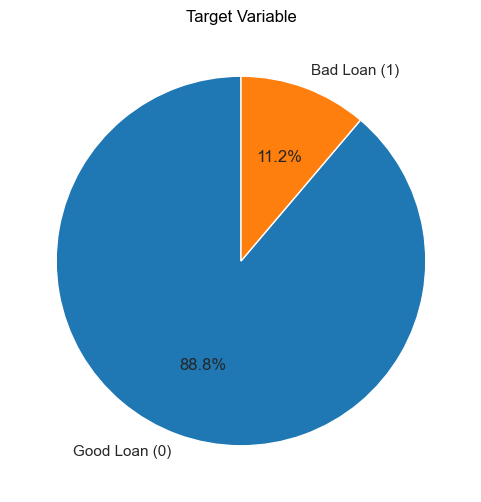

In [12]:
x_label = ['Good Loan (0)', 'Bad Loan (1)']
loan_counts = df['good_bad'].value_counts()

# Membuat pie chart
plt.figure(figsize=(6, 6))
plt.title('Target Variable')
sns.set(style="whitegrid")
sns.color_palette("pastel")
plt.pie(loan_counts, labels=x_label, autopct='%1.1f%%', startangle=90)
plt.show()

There is data imbalance in the dataset, where there are about 89% good loan data and 11% bad loan data.

In [13]:
# drop loan_stats
df.drop('loan_status', axis = 1, inplace = True)

## DATA CLEANING

checking categorical columns

In [14]:
for col in df.select_dtypes(include= ['object','bool']).columns:
    print(col)
    print(df[col].unique())
    print()

term
[' 36 months' ' 60 months']

grade
['B' 'C' 'A' 'E' 'F' 'D' 'G']

sub_grade
['B2' 'C4' 'C5' 'C1' 'B5' 'A4' 'E1' 'F2' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F4' 'F1' 'E5'
 'G4' 'E2' 'G3' 'G2' 'G1' 'F5' 'G5']

emp_title
[nan 'Ryder' 'AIR RESOURCES BOARD' ... 'MecÃ¡nica'
 'Chief of Interpretation (Park Ranger)' 'Server Engineer Lead']

emp_length
['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]

home_ownership
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']

verification_status
['Verified' 'Source Verified' 'Not Verified']

issue_d
['Dec-11' 'Nov-11' 'Oct-11' 'Sep-11' 'Aug-11' 'Jul-11' 'Jun-11' 'May-11'
 'Apr-11' 'Mar-11' 'Feb-11' 'Jan-11' 'Dec-10' 'Nov-10' 'Oct-10' 'Sep-10'
 'Aug-10' 'Jul-10' 'Jun-10' 'May-10' 'Apr-10' 'Mar-10' 'Feb-10' 'Jan-10'
 'Dec-09' 'Nov-09' 'Oct-09' 'Sep-09' 'Aug-09' 'Jul-09' 'Jun-09' 'May-09'
 'Apr-09' 'Mar-09' 'Feb-09' 'Jan-09' 'Dec-08' 'Nov-

[nan 'Feb-16' 'Jan-16' 'Sep-13' 'Feb-14' 'May-14' 'Jun-13' 'Mar-12'
 'Apr-12' 'May-13' 'Aug-12' 'Aug-13' 'Jun-12' 'Nov-13' 'Feb-12' 'Oct-11'
 'Jan-13' 'Jan-14' 'Jul-13' 'Jul-15' 'Jan-12' 'Dec-12' 'Jun-11' 'Feb-13'
 'Nov-11' 'Nov-12' 'Dec-11' 'Aug-11' 'Sep-11' 'Apr-11' 'Mar-14' 'Apr-13'
 'Mar-11' 'Jul-12' 'Aug-14' 'Oct-13' 'Sep-12' 'May-12' 'Apr-15' 'Jul-11'
 'Dec-15' 'Dec-13' 'Jan-11' 'Oct-12' 'Nov-14' 'Mar-13' 'Aug-15' 'Feb-15'
 'May-15' 'Jul-14' 'Nov-15' 'Sep-14' 'Oct-15' 'May-11' 'Feb-11' 'Dec-14'
 'Jun-15' 'Apr-14' 'Jan-15' 'Sep-15' 'Jun-14' 'Nov-10' 'Oct-10' 'Dec-10'
 'Mar-15' 'Oct-14' 'Jul-10' 'Sep-10' 'May-10' 'Aug-10' 'Mar-10' 'Jun-10'
 'Apr-10' 'Feb-10' 'Dec-09' 'Nov-09' 'Oct-09' 'Jan-10' 'Sep-09' 'Jun-09'
 'Aug-09' 'Jul-09' 'May-09' 'Apr-09' 'Jan-09' 'Oct-08' 'Feb-09' 'Nov-08'
 'Sep-08' 'Mar-09' 'Dec-08' 'Aug-08' 'Jun-08' 'Jul-08' 'Apr-08' 'May-08'
 'Feb-08' 'Jan-08' 'Mar-08' 'Dec-07' 'Mar-16']

last_credit_pull_d
['Jan-16' 'Sep-13' 'Jan-15' 'Sep-15' 'Dec-14' 'Aug-12' 'Mar-13

identify some columns that need improvement

In [15]:
# Kolom/feature yang harus di cleaning
col_need_to_clean = ['term', 'emp_length', 'issue_d', 'earliest_cr_line', 'last_pymnt_d', 
                    'next_pymnt_d', 'last_credit_pull_d']

#### term
Remove ' months' to '' then Convert data type to numeric 

In [16]:
df['term'] = pd.to_numeric(df['term'].str.replace(' months', ''))
df['term'].unique()

array([36, 60], dtype=int64)

#### emp_length

In [17]:
df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [18]:
df['emp_length'] = df['emp_length'].str.replace('\+ years', '')
df['emp_length'] = df['emp_length'].str.replace(' years', '')
df['emp_length'] = df['emp_length'].str.replace('< 1 year', str(0))
df['emp_length'] = df['emp_length'].str.replace(' year', '')

df['emp_length'].fillna(value = 0, inplace=True)
df['emp_length'] = pd.to_numeric(df['emp_length'])

In [19]:
df['emp_length'].unique()

array([10,  0,  1,  3,  8,  9,  4,  5,  6,  2,  7], dtype=int64)

#### date feature 

In [20]:
col_date = ['issue_d', 'earliest_cr_line', 'last_pymnt_d',
                    'next_pymnt_d', 'last_credit_pull_d']

df[col_date].tail(3)

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
466282,Jan-14,Dec-01,Jan-16,Feb-16,Dec-15
466283,Jan-14,Feb-03,Dec-14,NaN,Apr-15
466284,Jan-14,Feb-00,Jan-16,Feb-16,Jan-16


In [21]:
for col in col_date:
    df[col] = pd.to_datetime(df[col], format='%b-%y')

In [22]:
df[col_date].tail(3)

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
466282,2014-01-01,2001-12-01,2016-01-01,2016-02-01,2015-12-01
466283,2014-01-01,2003-02-01,2014-12-01,NaT,2015-04-01
466284,2014-01-01,2000-02-01,2016-01-01,2016-02-01,2016-01-01


In [23]:
# Check apakah berhasil di cleaning
df[col_need_to_clean].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   term                466285 non-null  int64         
 1   emp_length          466285 non-null  int64         
 2   issue_d             466285 non-null  datetime64[ns]
 3   earliest_cr_line    466256 non-null  datetime64[ns]
 4   last_pymnt_d        465909 non-null  datetime64[ns]
 5   next_pymnt_d        239071 non-null  datetime64[ns]
 6   last_credit_pull_d  466243 non-null  datetime64[ns]
dtypes: datetime64[ns](5), int64(2)
memory usage: 24.9 MB


## MISSING VALUE

Features that have more than 50% missing values will be dropped, because if you want to fill it with other values such as median or mean, the error will be very high. It is better to drop it so as not to make the model even more inaccurate.

In [24]:
missing_values = pd.DataFrame(df.isnull().sum()/df.shape[0])
missing_values = missing_values[missing_values.iloc[:,0] > 0.50]
missing_values.sort_values([0], ascending=False)

,0
open_il_24m,1.000000
mths_since_rcnt_il,1.000000
total_cu_tl,1.000000
inq_fi,1.000000
all_util,1.000000
max_bal_bc,1.000000
open_rv_24m,1.000000
open_rv_12m,1.000000
il_util,1.000000
total_bal_il,1.000000


there are 21 columns that can be deleted

In [25]:
df.dropna(thresh = df.shape[0]*0.5, axis=1, inplace=True)

In [26]:
df.shape

(466285, 54)

# EDA (Exploratory Data Analysis)

In [27]:
df.sample()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,good_bad
52389,52389,9415013,11247141,5825,5825,5825.0,36,11.99,193.45,B,...,2016-02-01,2016-01-01,0.0,1,INDIVIDUAL,0.0,0.0,26133.0,16500.0,0


In [29]:
def cat_stats(df, FEATURES):
    for feature in FEATURES:
        temp = df[feature].value_counts()
        df1 = pd.DataFrame({feature: temp.index, 'value': temp.values})
        cat_perc_0 = df[df['good_bad'] == 0].groupby(feature).size().reset_index(name='Count_Target_0')
        cat_perc_1 = df[df['good_bad'] == 1].groupby(feature).size().reset_index(name='Count_Target_1')
        cat_perc = cat_perc_0.merge(cat_perc_1, how='left', on=feature).fillna(0)
        cat_perc['Percentage_Target_0'] = cat_perc['Count_Target_0'] / (cat_perc['Count_Target_0'] + cat_perc['Count_Target_1']) * 100
        cat_perc['Percentage_Target_1'] = cat_perc['Count_Target_1'] / (cat_perc['Count_Target_0'] + cat_perc['Count_Target_1']) * 100
        cat_perc.sort_values(by=feature, inplace=True)
        
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 6))
        
        sns.set_color_codes("pastel")
        
        # Plot distribution for TARGET == 0
        sns.barplot(ax=ax1, x=feature, y="Percentage_Target_0", data=cat_perc)
        ax1.set_xticklabels(ax1.get_xticklabels(), rotation=50, fontsize=8)
        
        # Plot distribution for TARGET == 1
        sns.barplot(ax=ax2, x=feature, y='Percentage_Target_1', data=cat_perc)
        ax2.set_xticklabels(ax2.get_xticklabels(), rotation=50, fontsize=8)
        
        
        plt.tick_params(axis='both', which='major', labelsize=10)
        plt.show()

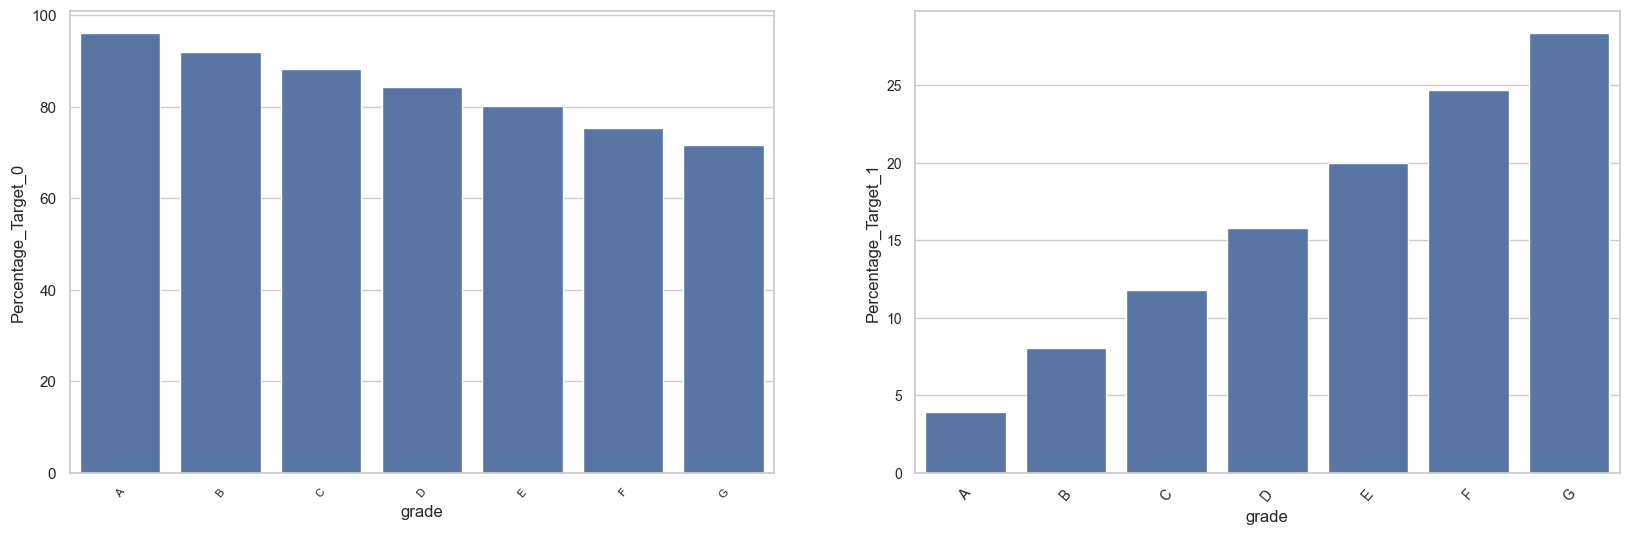

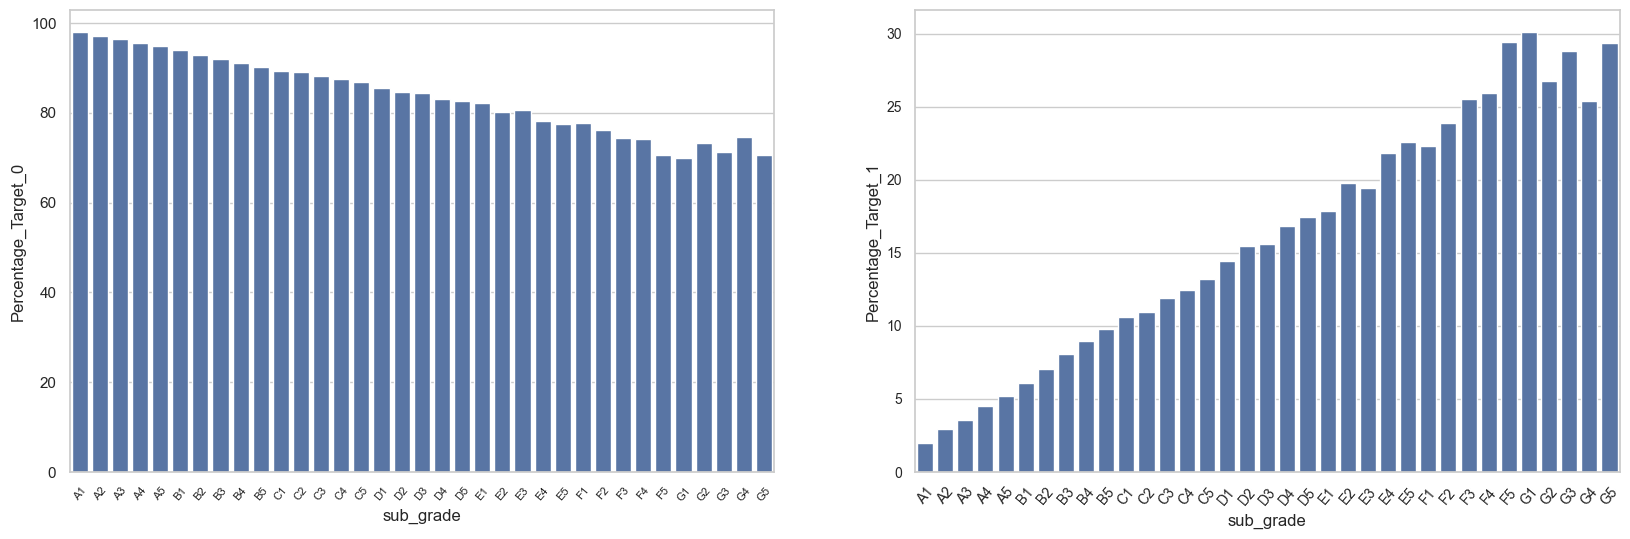

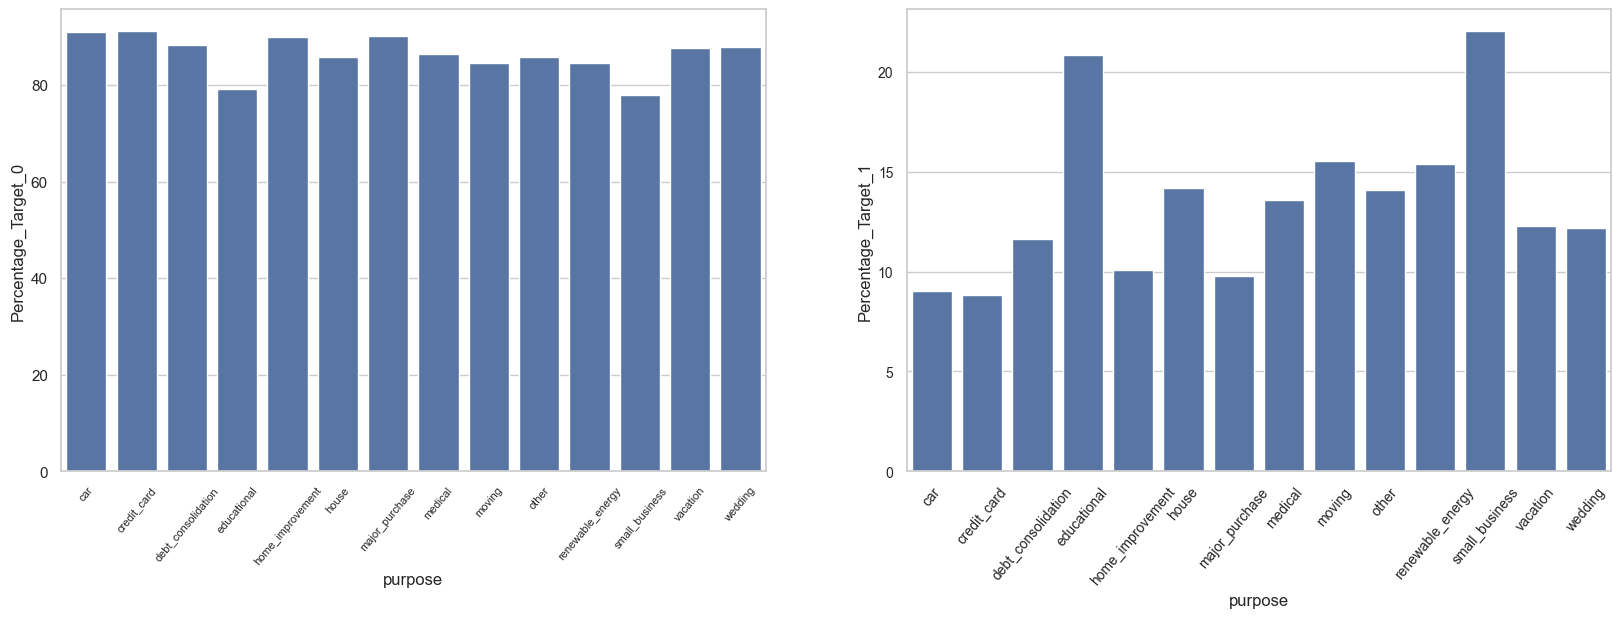

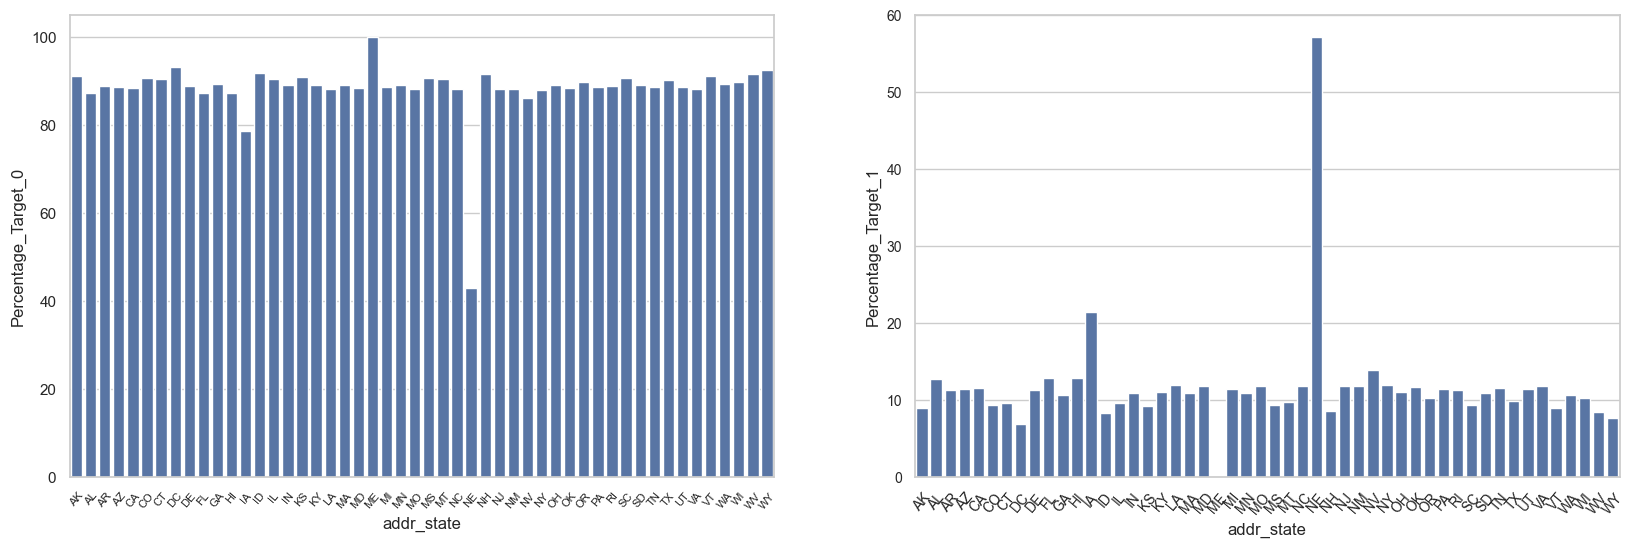

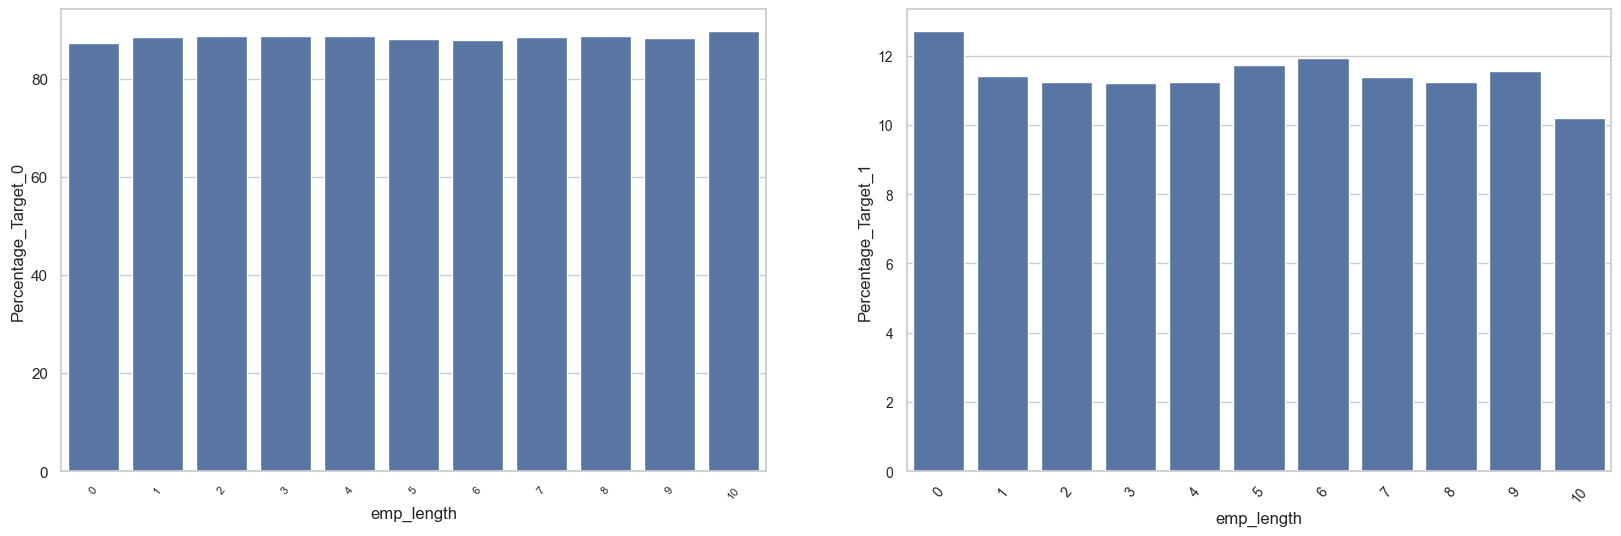

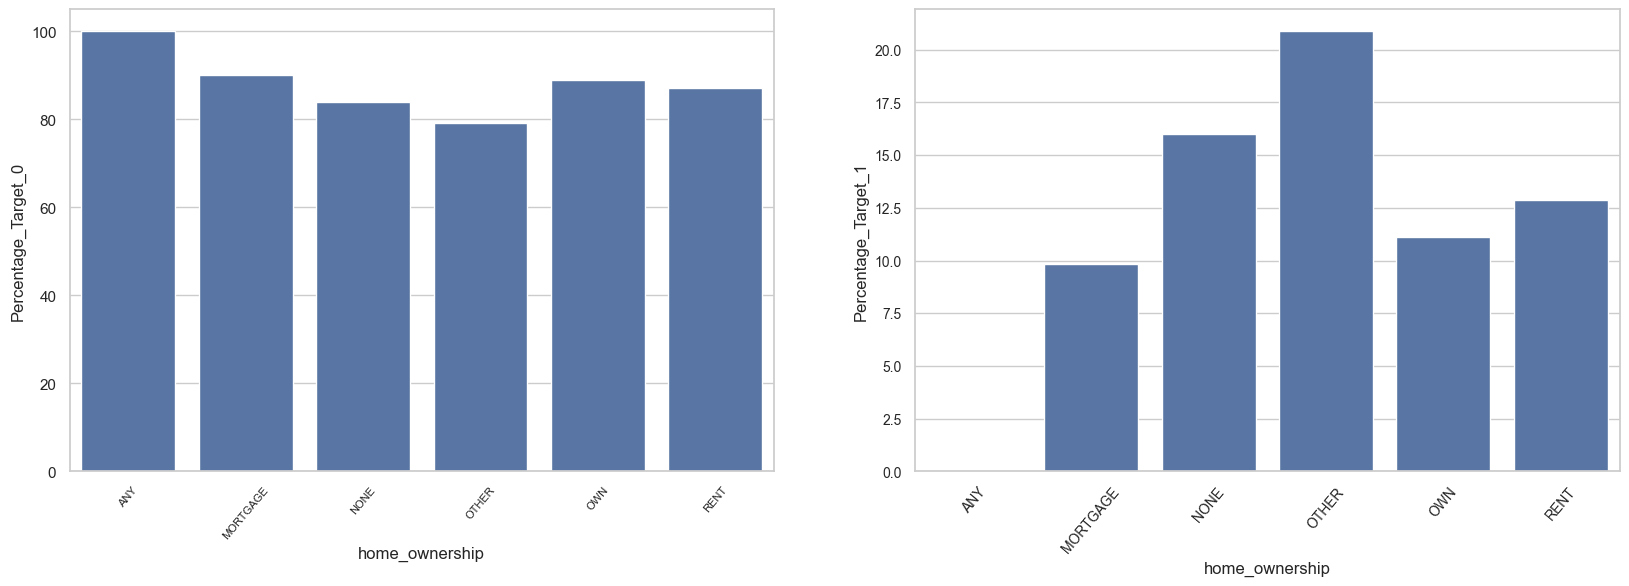

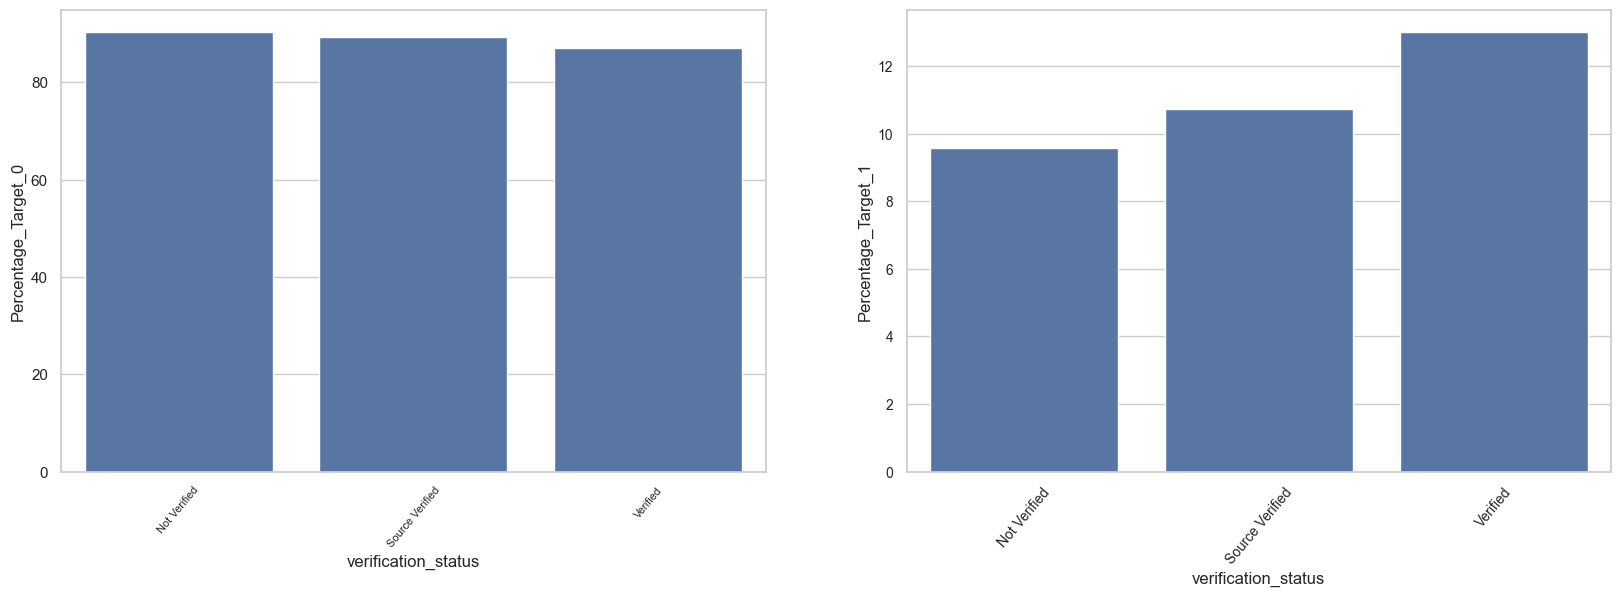

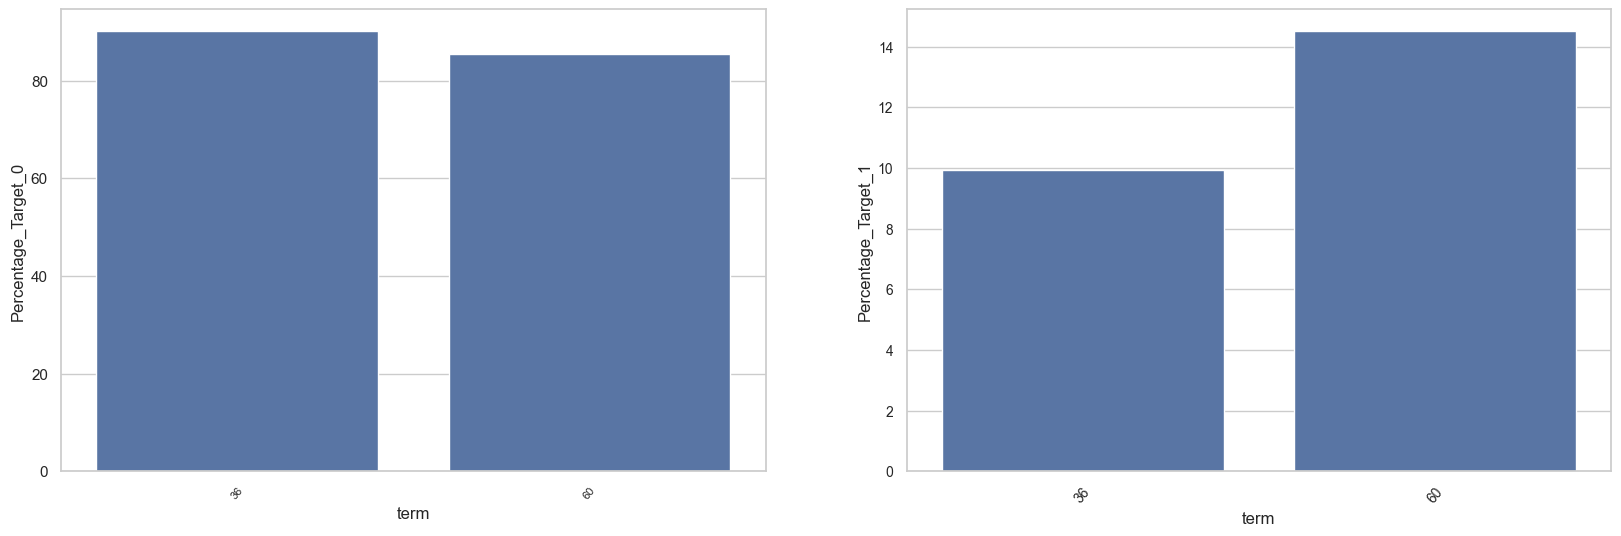

In [30]:
important_features = ['grade', 'sub_grade', 'purpose', 'addr_state', 'emp_length', 'home_ownership', 'verification_status', 'term']
cat_stats(df,important_features)

Based on the analysis, it appears that individuals with grade categories 'G', 'F', and 'E' are less likely to repay their loans, with subgrade G1 being the subgrade with the highest default rate. In addition, people who borrowed money to support a small business, move into a new home, or get married were less likely to repay the loan. Region of residence also plays an important role, with people in Hawaii, Delaware, and Alabama being less likely to repay loans, possibly due to the high cost of daily necessities in those regions. On the other hand, people in Iowa are more likely to repay their loans.

Employment is also a significant factor; people who have recently started working are less likely to repay loans. Housing status also comes into play, with people who do not own a home or who rent a place less likely to repay the loan. Account verification also has an impact, with people who have verified their accounts having a higher likelihood of repaying the loan.

In addition, the duration of the loan also plays an important role. People who chose the 60-month (5-year) option for their loan had a lower likelihood of repaying their loan, possibly due to the length of the loan. All of these findings provide valuable insights into understanding loan repayment patterns and can be used for wiser lending decisions in the future.

### Highly correlated column

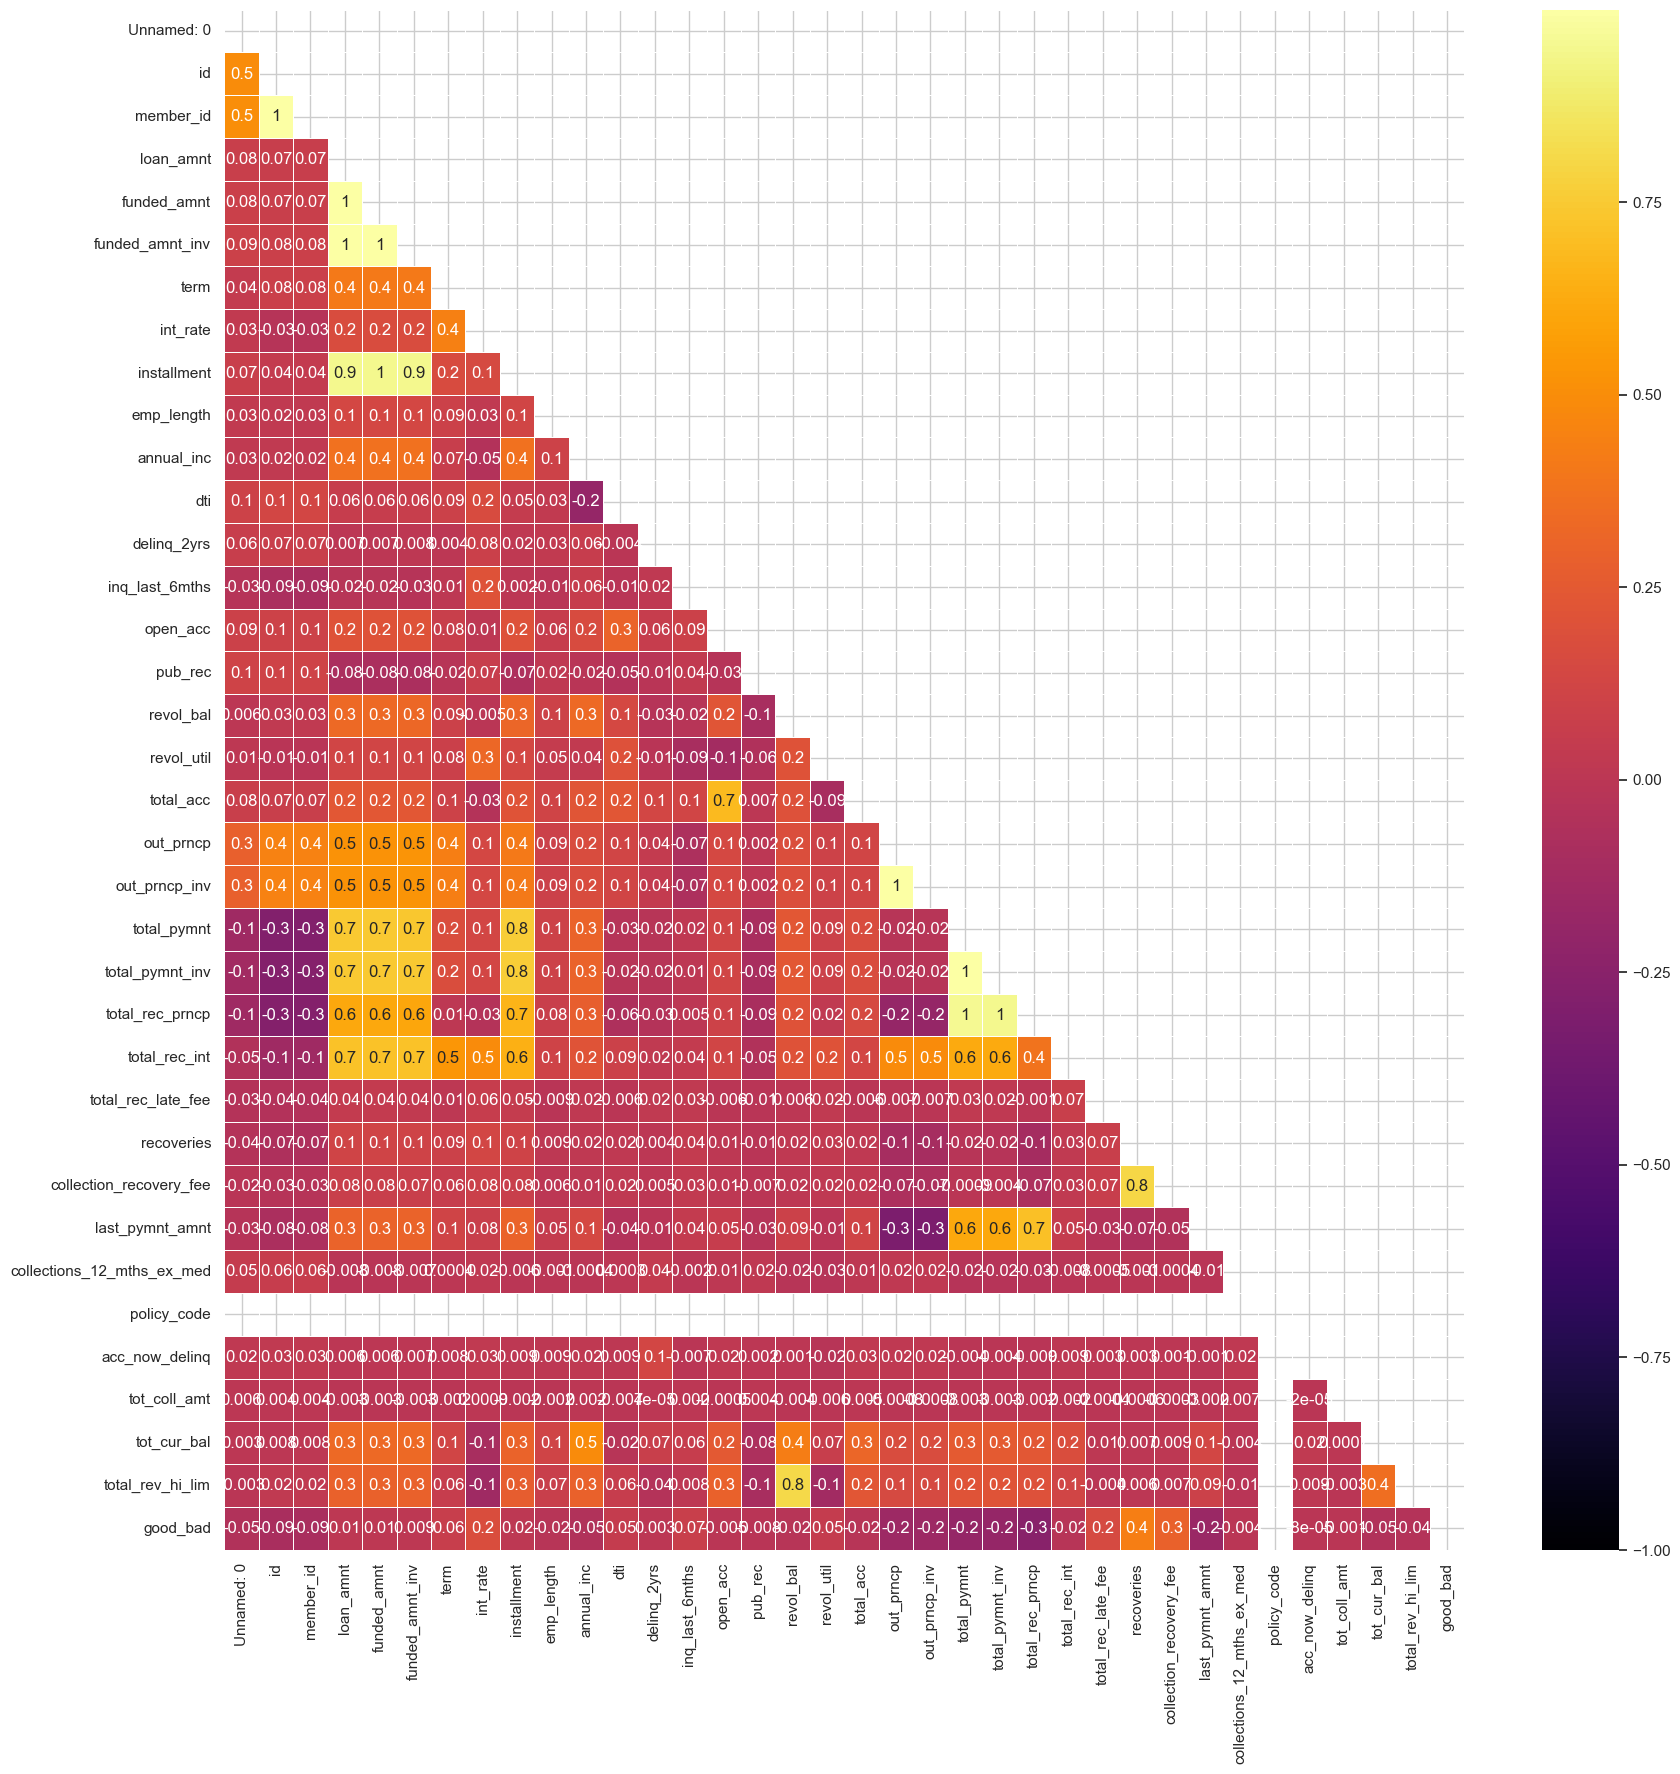

In [36]:
mask = np.zeros_like(df.corr().fillna(0), dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), mask = mask, annot = True,  cmap = "inferno", vmin = -1, fmt = '.1g', edgecolor = 'w', linewidth = 0.6)
plt.show()

Here, if there are pairs of features that have a high correlation, one of them will be taken. The correlation value used as a benchmark for high correlation is uncertain, generally 0.7 is used.

In [37]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] >= 0.7)]

to_drop_hicorr

['member_id',
 'funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'total_rev_hi_lim']

In [38]:
df.drop(to_drop_hicorr, axis=1, inplace=True)

In [39]:
df.shape

(466285, 42)

### Cardinality

At this stage, features that have a very high unique value (high cardinality) and features that have only one unique value are removed.

In [40]:
df.select_dtypes(include='object').nunique()

grade                       7
sub_grade                  35
emp_title              205475
home_ownership              6
verification_status         3
pymnt_plan                  2
url                    466285
purpose                    14
title                   63099
zip_code                  888
addr_state                 50
initial_list_status         2
application_type            1
dtype: int64

In [41]:
df.drop(['emp_title', 'url', 'title', 'application_type'], axis = 1, inplace = True)

df.select_dtypes(exclude = 'object').nunique()

Unnamed: 0                    466285
id                            466285
loan_amnt                       1352
term                               2
int_rate                         506
emp_length                        11
annual_inc                     31901
issue_d                           91
dti                             3997
delinq_2yrs                       24
earliest_cr_line                 664
inq_last_6mths                    28
open_acc                          62
pub_rec                           26
revol_bal                      58142
revol_util                      1269
total_acc                        112
out_prncp                     135665
total_rec_late_fee              5808
recoveries                     22773
last_pymnt_d                      98
next_pymnt_d                     100
last_credit_pull_d               103
collections_12_mths_ex_med         9
policy_code                        1
acc_now_delinq                     6
tot_coll_amt                    6321
t

In [42]:
df.drop(['Unnamed: 0', 'id', 'policy_code'], axis = 1, inplace = True)

### dominant category class feature

In [43]:
# the percentage distribution of unique values in each column of object data type (string or category) in a DataFramedata
for col in df.select_dtypes(include='object').columns.tolist():
    print(df[col].value_counts(normalize=True)*100)
    print('\n')

B    29.365946
C    26.870476
D    16.489486
A    16.056060
E     7.668486
F     2.837106
G     0.712440
Name: grade, dtype: float64


B3    6.795415
B4    6.542136
C1    5.780370
C2    5.734690
B2    5.706810
C3    5.429512
B5    5.415572
C4    5.169585
B1    4.906012
C5    4.756319
A5    4.666030
D1    4.130735
A4    4.084412
D2    3.655704
D3    3.198902
D4    3.023687
A3    2.695347
D5    2.480457
A2    2.349636
A1    2.260635
E1    1.937227
E2    1.859163
E3    1.496081
E4    1.285051
E5    1.090964
F1    0.844977
F2    0.643598
F3    0.580761
F4    0.443291
F5    0.324480
G1    0.237837
G2    0.176501
G3    0.125031
G4    0.090503
G5    0.082568
Name: sub_grade, dtype: float64


MORTGAGE    50.586015
RENT        40.420129
OWN          8.943886
OTHER        0.039032
NONE         0.010723
ANY          0.000214
Name: home_ownership, dtype: float64


Verified           36.041262
Source Verified    32.167666
Not Verified       31.791072
Name: verification_status, dtype: float64


n   

Features that are heavily dominated by only one of the values will be discarded at this stage.

In [44]:
df.drop('pymnt_plan', axis = 1, inplace = True)

In [45]:
df.shape

(466285, 34)

## Filling missing value 

In [46]:
df.isna().sum()

loan_amnt                          0
term                               0
int_rate                           0
grade                              0
sub_grade                          0
emp_length                         0
home_ownership                     0
annual_inc                         4
verification_status                0
issue_d                            0
purpose                            0
zip_code                           0
addr_state                         0
dti                                0
delinq_2yrs                       29
earliest_cr_line                  29
inq_last_6mths                    29
open_acc                          29
pub_rec                           29
revol_bal                          0
revol_util                       340
total_acc                         29
initial_list_status                0
out_prncp                          0
total_rec_late_fee                 0
recoveries                         0
last_pymnt_d                     376
n

In [48]:
columns_with_null = ['annual_inc', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
                     'pub_rec', 'revol_util', 'total_acc', 'last_pymnt_d', 'next_pymnt_d','last_credit_pull_d', 'collections_12_mths_ex_med',
                     'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal']

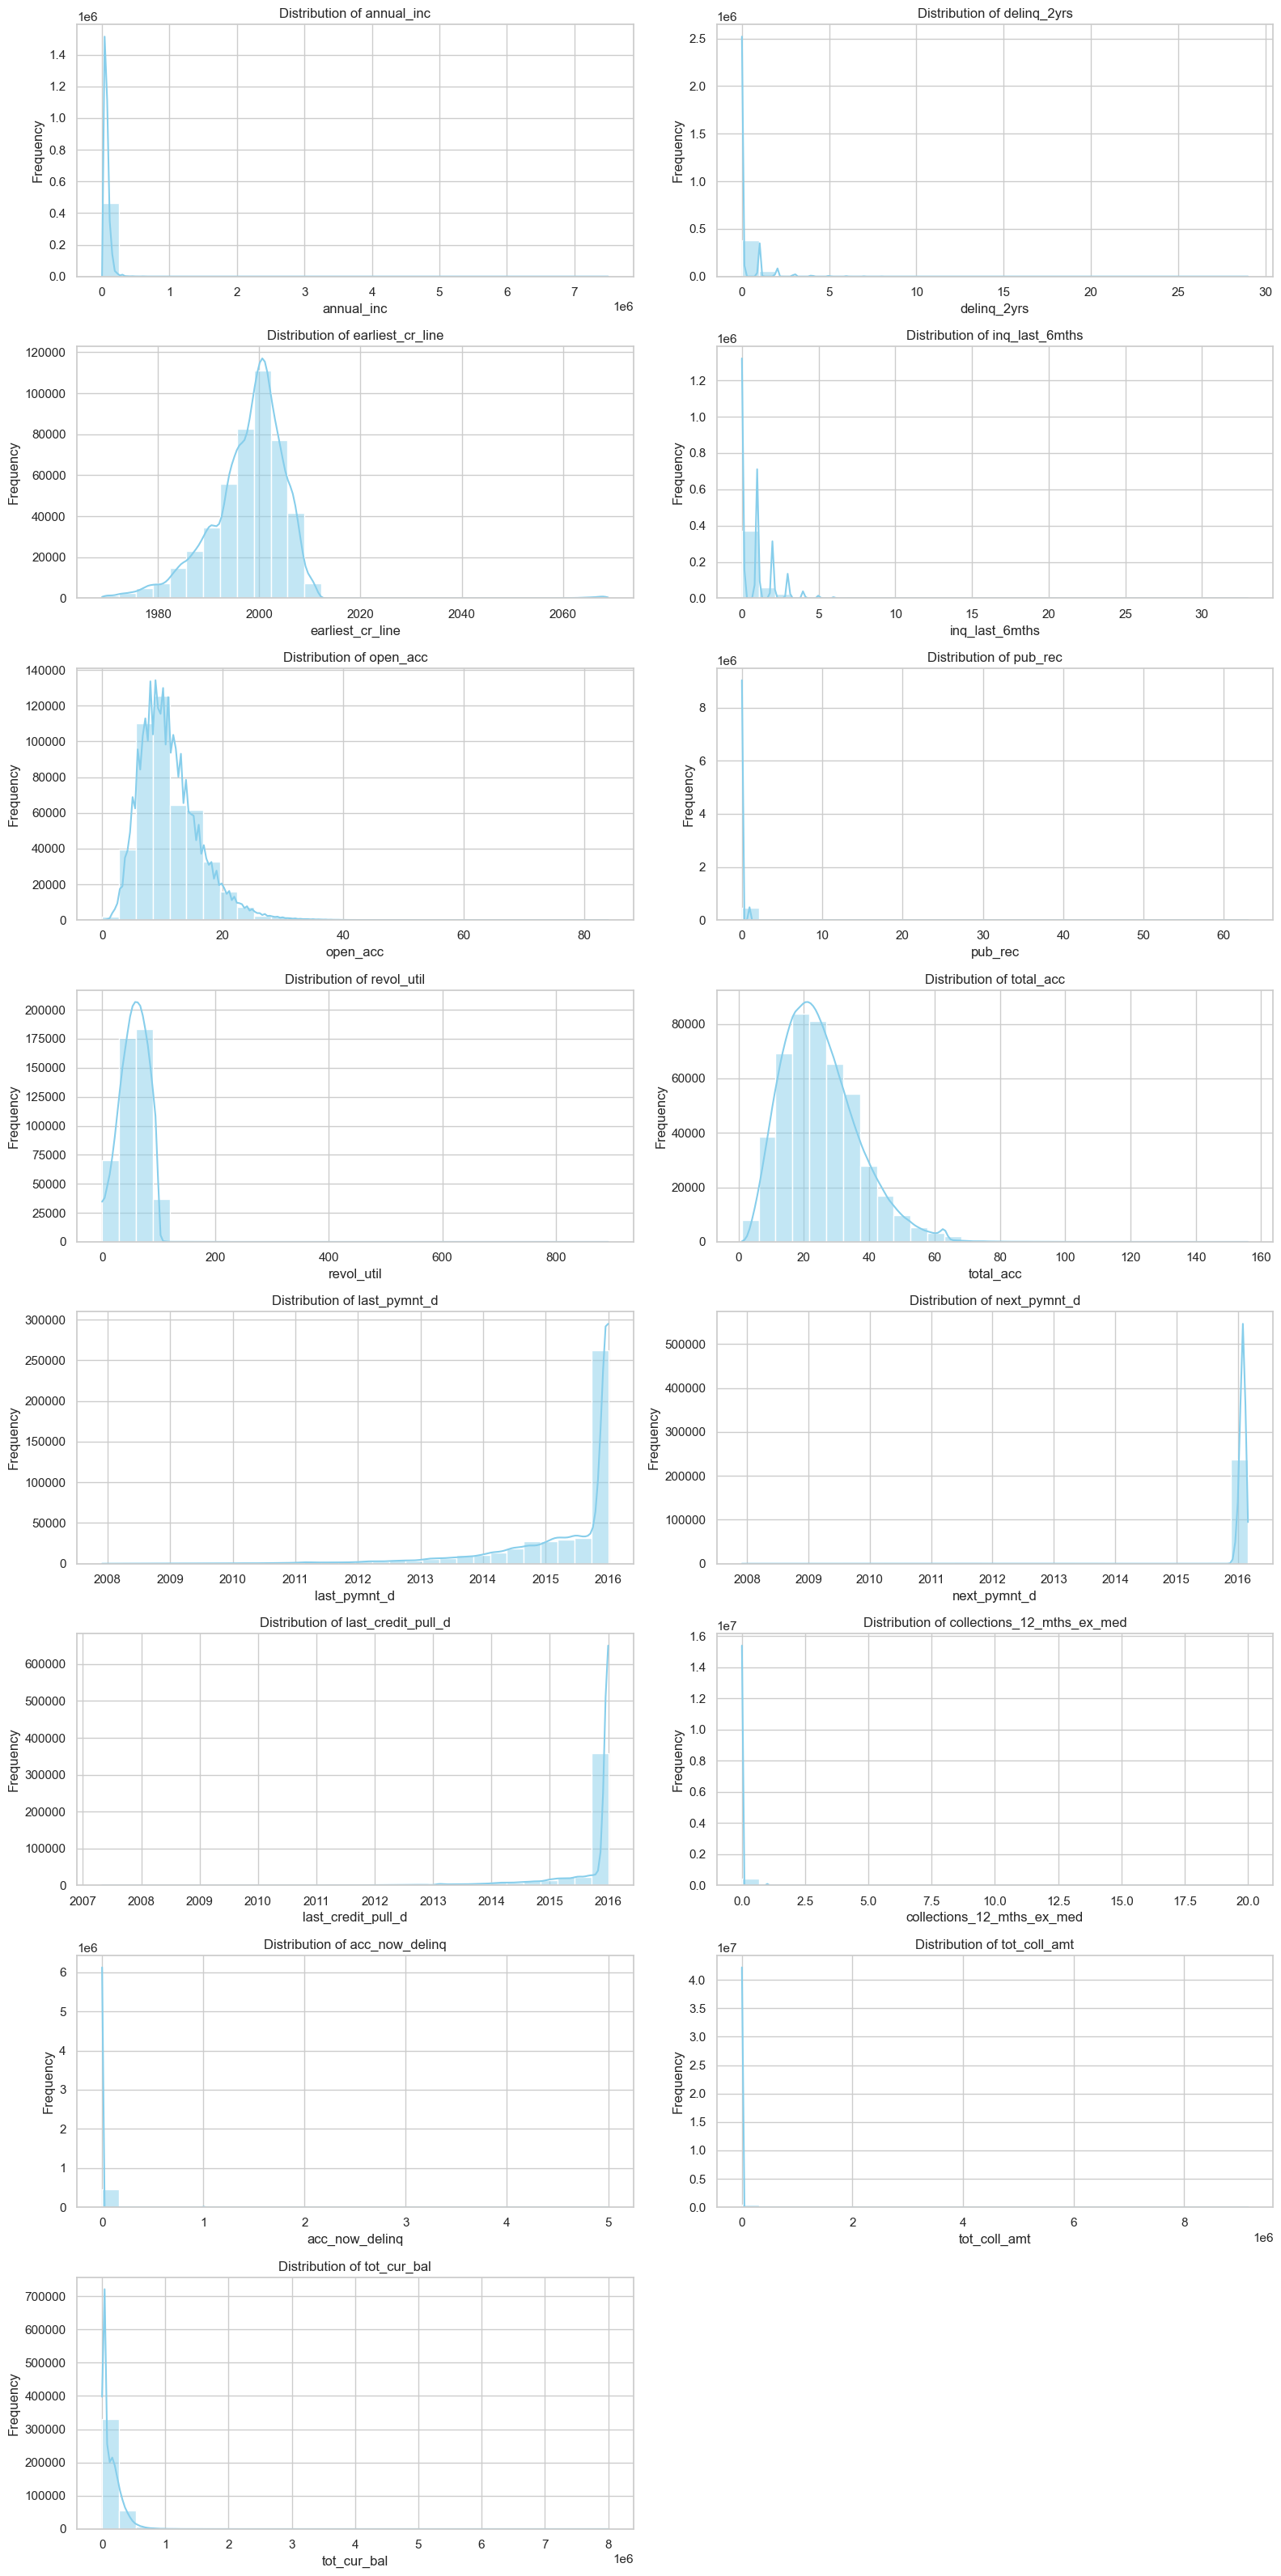

In [49]:
num_rows = len(columns_with_null) // 2 + len(columns_with_null) % 2
fig, axes = plt.subplots(num_rows, 2, figsize=(16, 4 * num_rows))
for i, column in enumerate(columns_with_null):
    row = i // 2
    col = i % 2
    sns.histplot(df[column].dropna(), bins=30, kde=True, color='skyblue', ax=axes[row, col])
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].set_title(f'Distribution of {column}')

if len(columns_with_null) % 2 != 0:
    fig.delaxes(axes[num_rows - 1, 1])

plt.tight_layout()
plt.show()

In [50]:
def fill_missing_values(data, columns_with_null):
    # Loop melalui kolom-kolom dengan nilai null dan mengisi nilai null berdasarkan tipe data kolomnya
    for column in columns_with_null:
        if data[column].dtype == 'object':
            # Jika tipe data kolom adalah object/kategori, isi dengan modus
            data[column].fillna(data[column].mode()[0], inplace=True)
        else:
            # Jika tipe data kolom adalah numerik, isi dengan median
            data[column].fillna(data[column].median(), inplace=True)
    
    return data
# Mengisi nilai null pada X_train
df = fill_missing_values(df, columns_with_null)

In [51]:
df.isna().sum()

loan_amnt                     0
term                          0
int_rate                      0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
purpose                       0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
total_rec_late_fee            0
recoveries                    0
last_pymnt_d                  0
next_pymnt_d                  0
last_credit_pull_d            0
collections_12_mths_ex_med    0
acc_now_delinq                0
tot_coll

In [54]:
for col in df.select_dtypes(exclude= ['int64', 'float64']).columns:
    print(col)
    print(df[col].unique())
    print()

grade
['B' 'C' 'A' 'E' 'F' 'D' 'G']

sub_grade
['B2' 'C4' 'C5' 'C1' 'B5' 'A4' 'E1' 'F2' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F4' 'F1' 'E5'
 'G4' 'E2' 'G3' 'G2' 'G1' 'F5' 'G5']

home_ownership
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']

verification_status
['Verified' 'Source Verified' 'Not Verified']

issue_d
['2011-12-01T00:00:00.000000000' '2011-11-01T00:00:00.000000000'
 '2011-10-01T00:00:00.000000000' '2011-09-01T00:00:00.000000000'
 '2011-08-01T00:00:00.000000000' '2011-07-01T00:00:00.000000000'
 '2011-06-01T00:00:00.000000000' '2011-05-01T00:00:00.000000000'
 '2011-04-01T00:00:00.000000000' '2011-03-01T00:00:00.000000000'
 '2011-02-01T00:00:00.000000000' '2011-01-01T00:00:00.000000000'
 '2010-12-01T00:00:00.000000000' '2010-11-01T00:00:00.000000000'
 '2010-10-01T00:00:00.000000000' '2010-09-01T00:00:00.000000000'
 '2010-08-01T00:00:00.000000000' '2010-07-01T00:00:00.000000000'
 '2010-06-01T00:00:00.000000000' '2010-05-01T00:00

['2016-02-01T00:00:00.000000000' '2016-01-01T00:00:00.000000000'
 '2013-09-01T00:00:00.000000000' '2014-02-01T00:00:00.000000000'
 '2014-05-01T00:00:00.000000000' '2013-06-01T00:00:00.000000000'
 '2012-03-01T00:00:00.000000000' '2012-04-01T00:00:00.000000000'
 '2013-05-01T00:00:00.000000000' '2012-08-01T00:00:00.000000000'
 '2013-08-01T00:00:00.000000000' '2012-06-01T00:00:00.000000000'
 '2013-11-01T00:00:00.000000000' '2012-02-01T00:00:00.000000000'
 '2011-10-01T00:00:00.000000000' '2013-01-01T00:00:00.000000000'
 '2014-01-01T00:00:00.000000000' '2013-07-01T00:00:00.000000000'
 '2015-07-01T00:00:00.000000000' '2012-01-01T00:00:00.000000000'
 '2012-12-01T00:00:00.000000000' '2011-06-01T00:00:00.000000000'
 '2013-02-01T00:00:00.000000000' '2011-11-01T00:00:00.000000000'
 '2012-11-01T00:00:00.000000000' '2011-12-01T00:00:00.000000000'
 '2011-08-01T00:00:00.000000000' '2011-09-01T00:00:00.000000000'
 '2011-04-01T00:00:00.000000000' '2014-03-01T00:00:00.000000000'
 '2013-04-01T00:00:00.000

# FEATURE ENGINEERING

In [55]:
df.shape

(466285, 34)

In [56]:
from datetime import date

date.today().strftime('%Y-%m-%d')

'2023-10-29'

Generally, reference date = today is used. However, since this dataset is a 2007-2014 dataset, it is more relevant to use a reference date around 2017. In this example, 2017-12-01 is used as the reference date.

In [57]:
df.sample()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,total_rec_late_fee,recoveries,last_pymnt_d,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,good_bad
463524,35000,60,15.61,C,C4,3,MORTGAGE,170000.0,Source Verified,2014-01-01,...,0.0,0.0,2015-05-01,2016-02-01,2015-05-01,0.0,0.0,0.0,490799.0,0


In [58]:
# feature engineering untuk date columns
def date_columns(df, column):
    today_date = pd.to_datetime('2017-12-01')
    df[column] = pd.to_datetime(df[column], format = "%b-%y")
    df['mths_since_' + column] = round(pd.to_numeric((today_date - df[column]) / np.timedelta64(1, 'M')))
#     df.drop(columns = [column], inplace=True)
    
# apply to X_train
for col in col_date:
    date_columns(df, col)
# date_columns(X_train, 'earliest_cr_line')
# date_columns(X_train, 'issue_d')
# date_columns(X_train, 'last_pymnt_d')
# date_columns(X_train, 'last_credit_pull_d')

In [59]:
for col in col_date:
    print(df['mths_since_' + col].describe())
    print("-----------------------------")

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_since_issue_d, dtype: float64
-----------------------------
count    466285.000000
mean        239.481530
std          93.971976
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64
-----------------------------
count    466285.000000
mean         31.288487
std          12.806406
min          23.000000
25%          23.000000
50%          24.000000
75%          35.000000
max         120.000000
Name: mths_since_last_pymnt_d, dtype: float64
-----------------------------
count    466285.000000
mean         22.378453
std           4.370769
min          21.000000
25%          22.000000
50%          22.000000
75%          22.000000
max         120.000000
Name: mths_since_next_pymnt_d, dtype:

handling negative value anomalies

In [60]:
df[df['mths_since_earliest_cr_line']<0][['earliest_cr_line', 'mths_since_earliest_cr_line']]

,earliest_cr_line,mths_since_earliest_cr_line
1580,2062-09-01,-537.0
1770,2068-09-01,-609.0
2799,2064-09-01,-561.0
3282,2067-09-01,-597.0
3359,2065-02-01,-566.0
...,...,...
464003,2068-01-01,-601.0
464260,2066-07-01,-583.0
465100,2067-10-01,-598.0
465500,2067-09-01,-597.0


there are some years that don't make sense.
The negative value arises because the Python function misinterprets the year 62 to be 2062, when it should be 1962.

To solve this, simply turn the negative value into a maximum value. Since the negative values here mean old data (1900s), it still makes sense if I change the values to the largest value.

In [61]:
df.loc[df['mths_since_earliest_cr_line']<0, 'mths_since_earliest_cr_line'] = df['mths_since_earliest_cr_line'].max()

In [62]:
df = df.drop(columns=df.select_dtypes(include=['datetime64']).columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   loan_amnt                      466285 non-null  int64  
 1   term                           466285 non-null  int64  
 2   int_rate                       466285 non-null  float64
 3   grade                          466285 non-null  object 
 4   sub_grade                      466285 non-null  object 
 5   emp_length                     466285 non-null  int64  
 6   home_ownership                 466285 non-null  object 
 7   annual_inc                     466285 non-null  float64
 8   verification_status            466285 non-null  object 
 9   purpose                        466285 non-null  object 
 10  zip_code                       466285 non-null  object 
 11  addr_state                     466285 non-null  object 
 12  dti                           

In [63]:
df.shape

(466285, 34)

# Feature Selection

In [64]:
df.sample()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,...,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,good_bad,mths_since_issue_d,mths_since_earliest_cr_line,mths_since_last_pymnt_d,mths_since_next_pymnt_d,mths_since_last_credit_pull_d
296411,7400,36,12.49,B,B5,10,RENT,35000.0,Not Verified,debt_consolidation,...,0.0,0.0,812.0,79456.0,0,38.0,187.0,23.0,22.0,23.0


In [65]:
for col in df.select_dtypes(include= ['object','bool']).columns:
    print(col)
    print(df[col].unique())
    print()

grade
['B' 'C' 'A' 'E' 'F' 'D' 'G']

sub_grade
['B2' 'C4' 'C5' 'C1' 'B5' 'A4' 'E1' 'F2' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F4' 'F1' 'E5'
 'G4' 'E2' 'G3' 'G2' 'G1' 'F5' 'G5']

home_ownership
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']

verification_status
['Verified' 'Source Verified' 'Not Verified']

purpose
['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational']

zip_code
['860xx' '309xx' '606xx' '917xx' '972xx' '852xx' '280xx' '900xx' '958xx'
 '774xx' '853xx' '913xx' '245xx' '951xx' '641xx' '921xx' '067xx' '890xx'
 '770xx' '335xx' '799xx' '605xx' '103xx' '150xx' '326xx' '564xx' '141xx'
 '080xx' '330xx' '974xx' '934xx' '405xx' '946xx' '445xx' '850xx' '604xx'
 '292xx' '088xx' '180xx' '029xx' '700xx' '010xx' '441xx' '104xx' '061xx'
 '616xx' '947xx' '914xx' '765xx' '980xx' '017xx' '752xx' '787xx' '077xx'


In [66]:
for col in df.select_dtypes(exclude= ['object','bool']).columns:
    print(col)
    print(df[col].unique())
    print()

loan_amnt
[ 5000  2500  2400 ... 33675 27775 33175]

term
[36 60]

int_rate
[10.65 15.27 15.96 13.49 12.69  7.9  18.64 21.28 14.65  9.91 16.29  6.03
 11.71 12.42 14.27 16.77  7.51  8.9  18.25  6.62 19.91 17.27 17.58 21.67
 19.42 22.06 20.89 20.3  23.91 19.03 23.52 23.13 22.74 22.35 24.11  6.
 22.11  7.49 11.99  5.99 10.99  9.99 18.79 11.49  8.49 15.99 16.49  6.99
 12.99 15.23 14.79  5.42 10.59 17.49 15.62 21.36 19.29 13.99 18.39 16.89
 17.99 20.62 20.99 22.85 19.69 20.25 23.22 21.74 22.48 23.59 12.62 18.07
 11.63  7.91  7.42 11.14 20.2  12.12 19.39 16.11 17.54 22.64 13.84 16.59
 17.19 12.87 20.69  9.67 21.82 19.79 18.49 22.94 24.59 24.4  21.48 14.82
 14.17  7.29 17.88 20.11 16.02 17.51 13.43 14.91 13.06 15.28 15.65 17.14
 11.11 10.37 16.4   7.66 10.   18.62 10.74  5.79  6.92  9.63 14.54 12.68
 19.36 13.8  18.99 21.59 20.85 21.22 19.74 20.48  6.91 12.23 12.61 10.36
  6.17  6.54  9.25 16.69 15.95  8.88 13.35  9.62 16.32 12.98 14.83 13.72
 14.09 14.46 20.03 17.8  15.2  15.57 18.54 19.66 1

In [67]:
cols_to_drop = [
    # beberapa kolom yang tidak berguna untuk pemodelan
    'zip_code'
    , 'grade'
    , 'mths_since_last_pymnt_d'
    , 'mths_since_next_pymnt_d'
    , 'mths_since_last_credit_pull_d'
]

In [68]:
df = df.drop(cols_to_drop, axis=1)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   term                         466285 non-null  int64  
 2   int_rate                     466285 non-null  float64
 3   sub_grade                    466285 non-null  object 
 4   emp_length                   466285 non-null  int64  
 5   home_ownership               466285 non-null  object 
 6   annual_inc                   466285 non-null  float64
 7   verification_status          466285 non-null  object 
 8   purpose                      466285 non-null  object 
 9   addr_state                   466285 non-null  object 
 10  dti                          466285 non-null  float64
 11  delinq_2yrs                  466285 non-null  float64
 12  inq_last_6mths               466285 non-null  float64
 13 

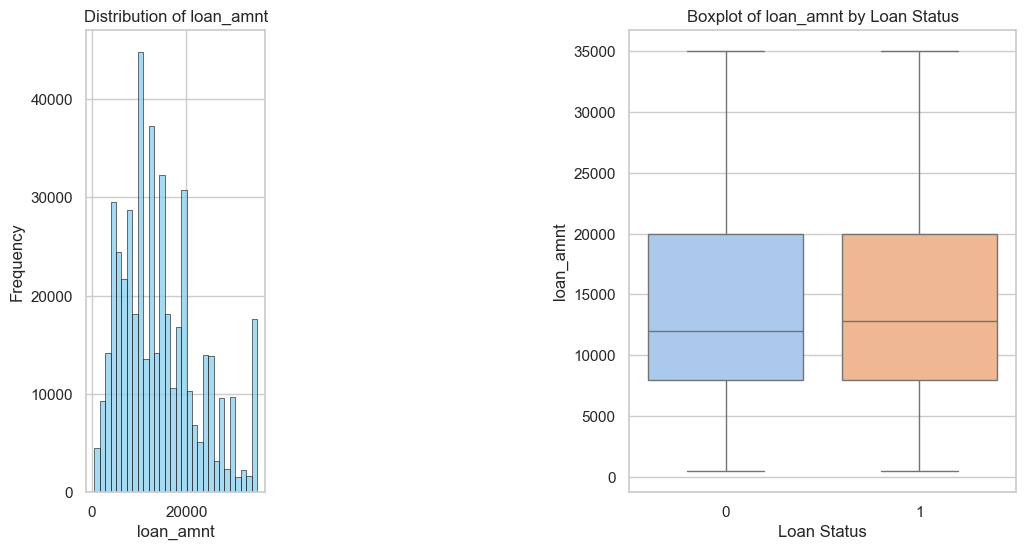

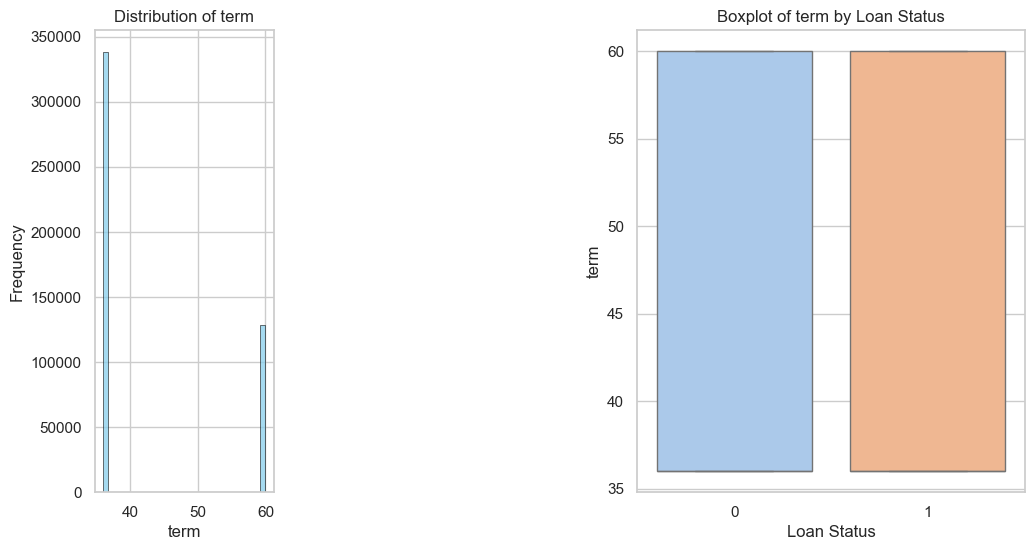

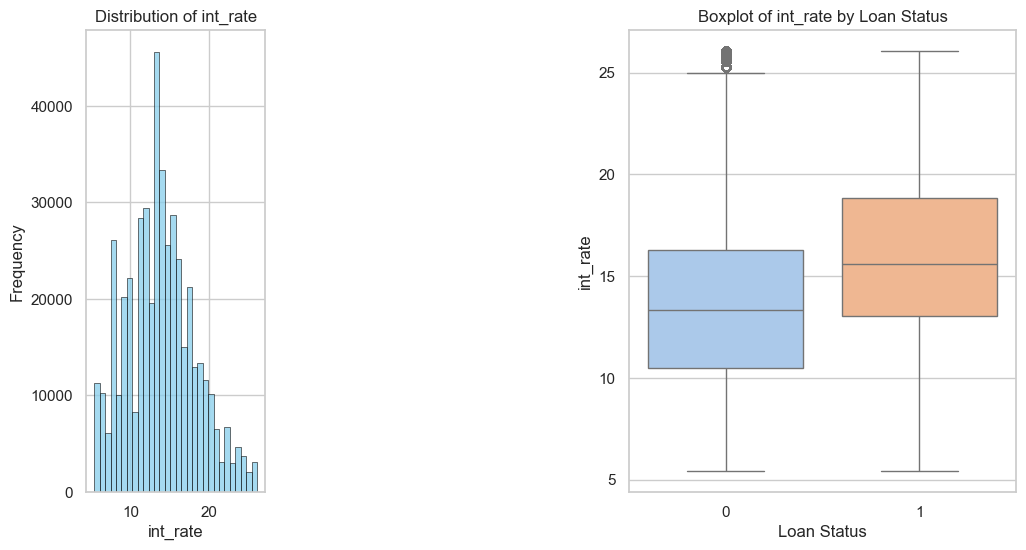

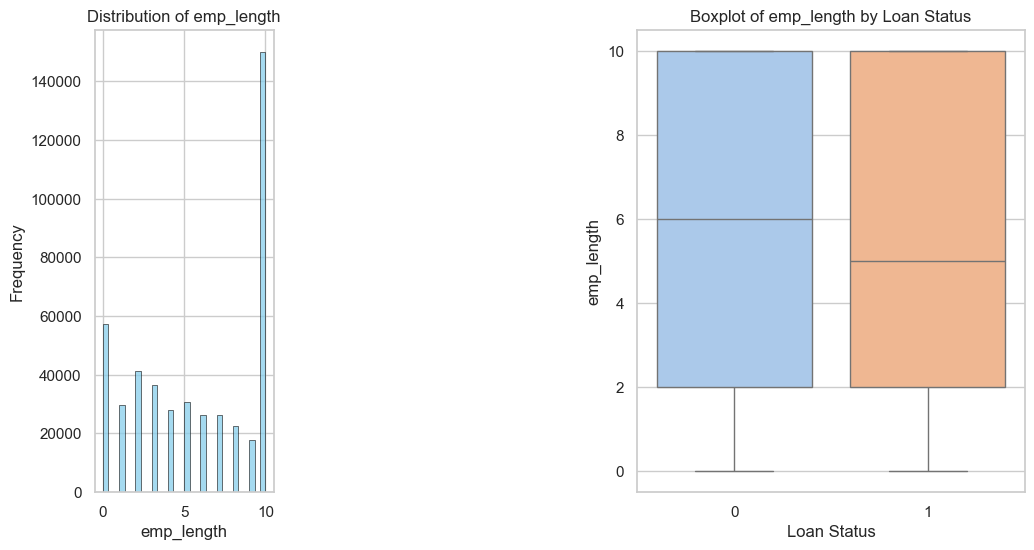

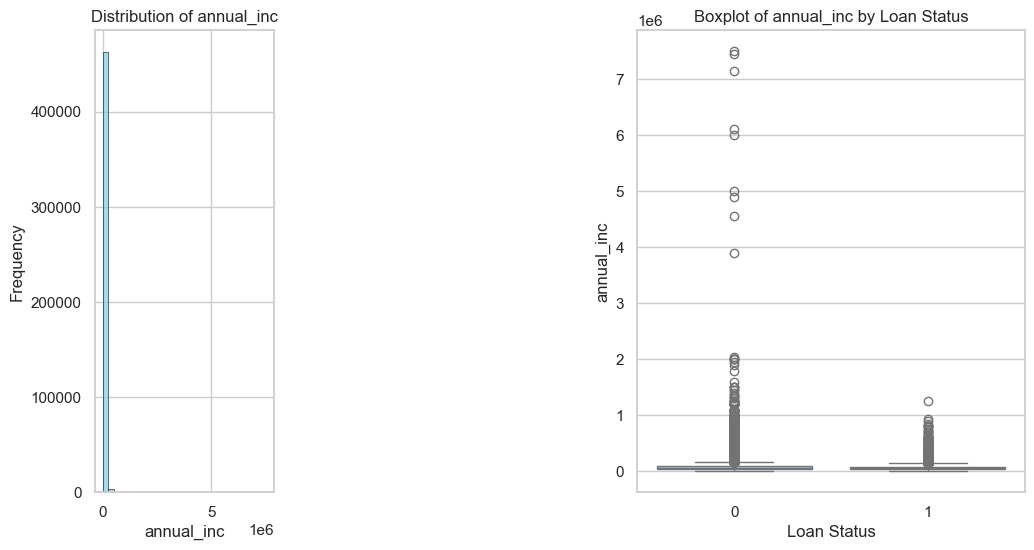

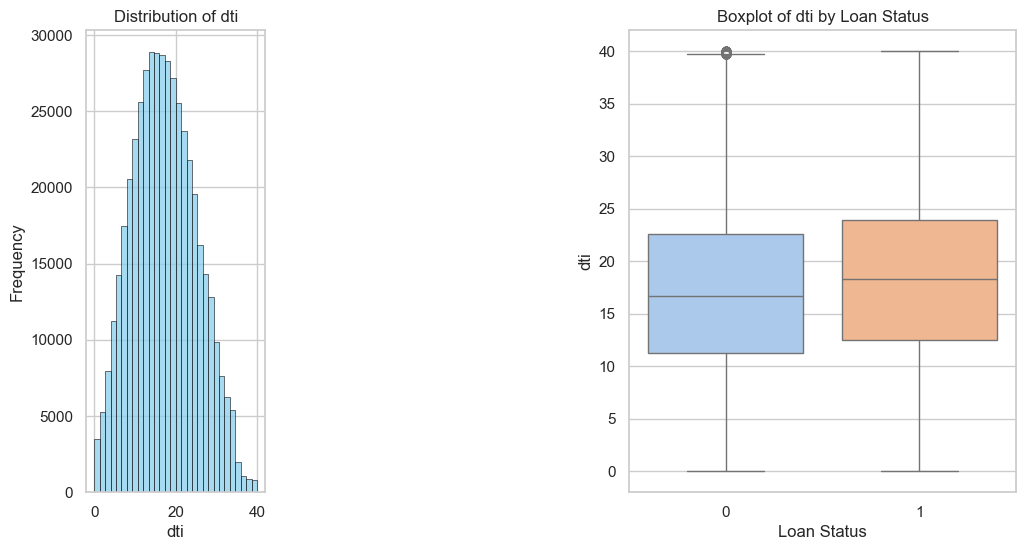

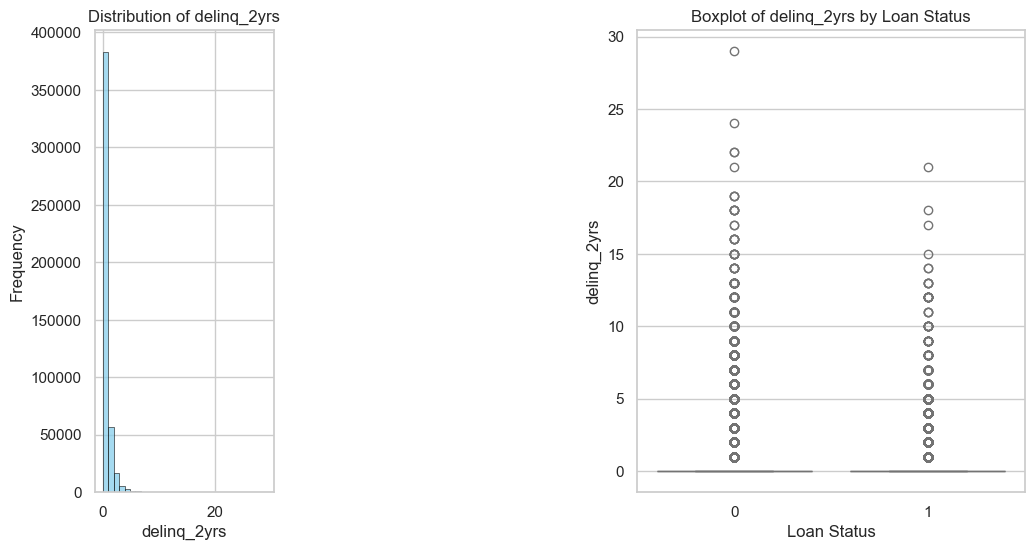

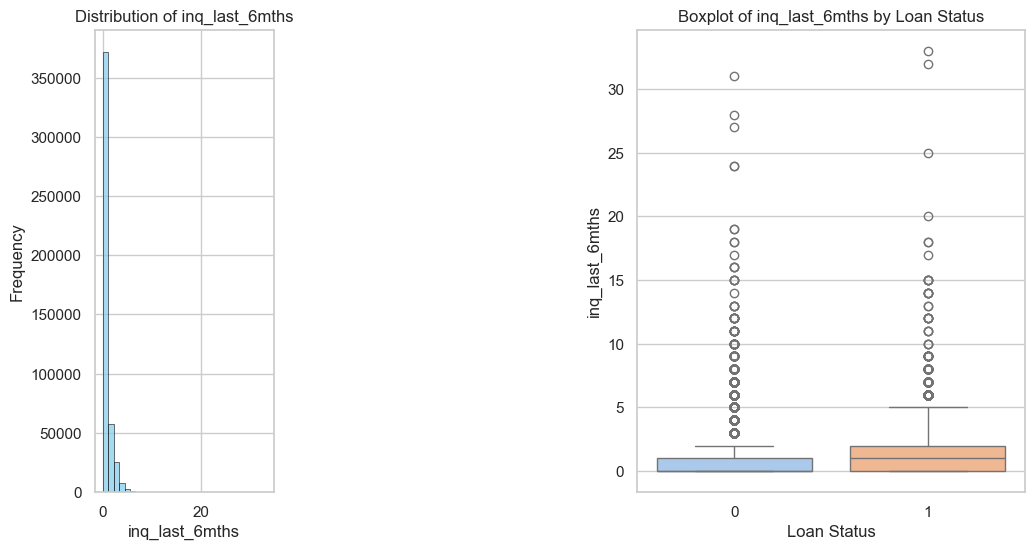

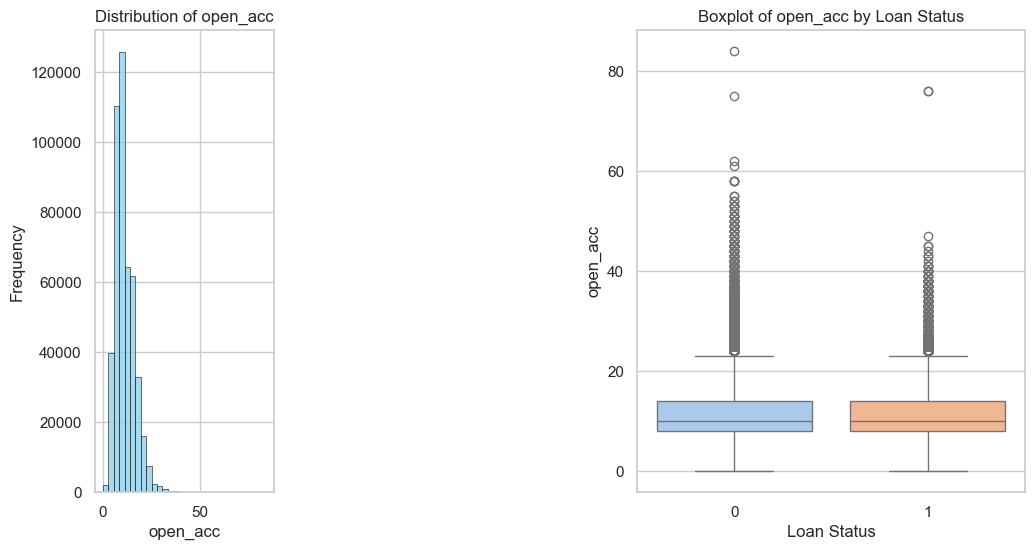

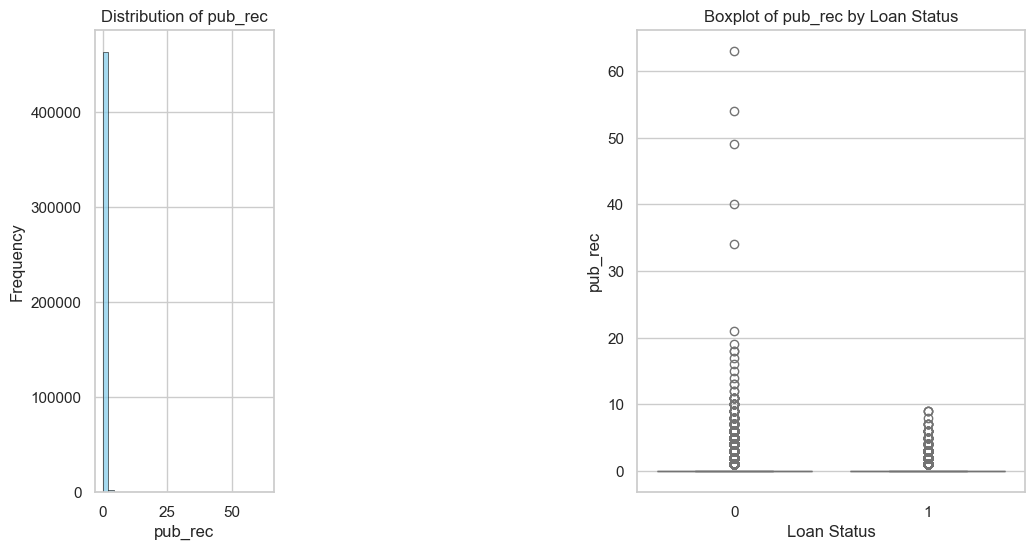

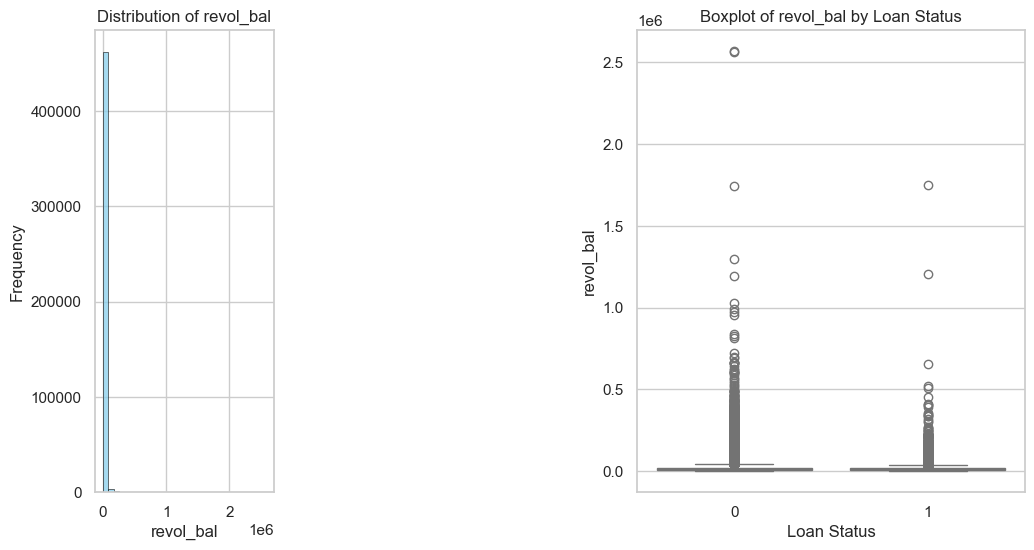

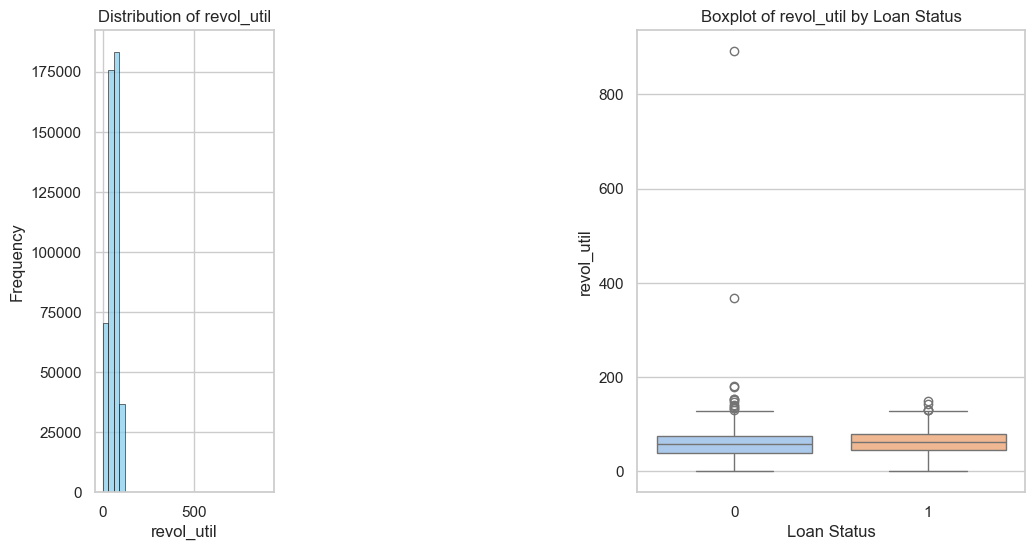

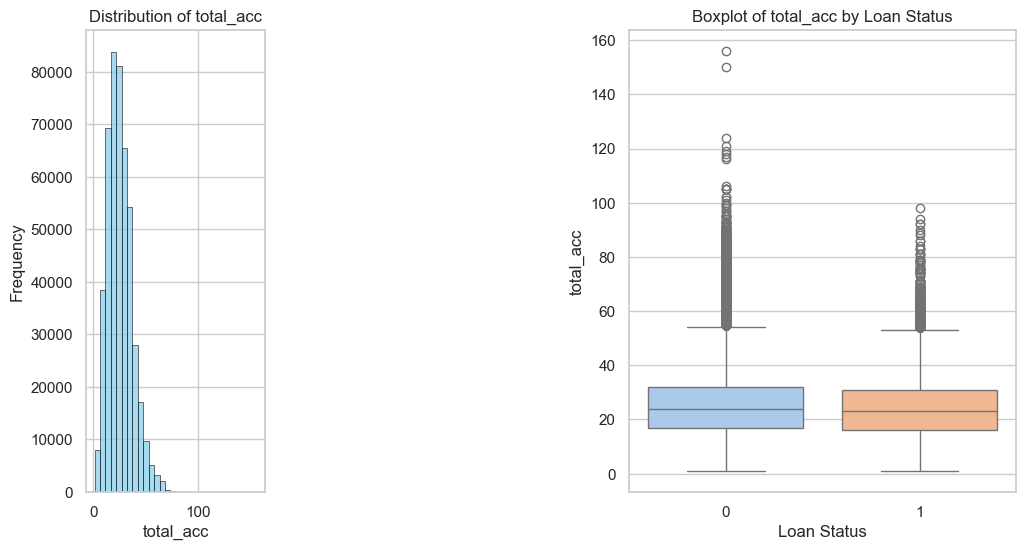

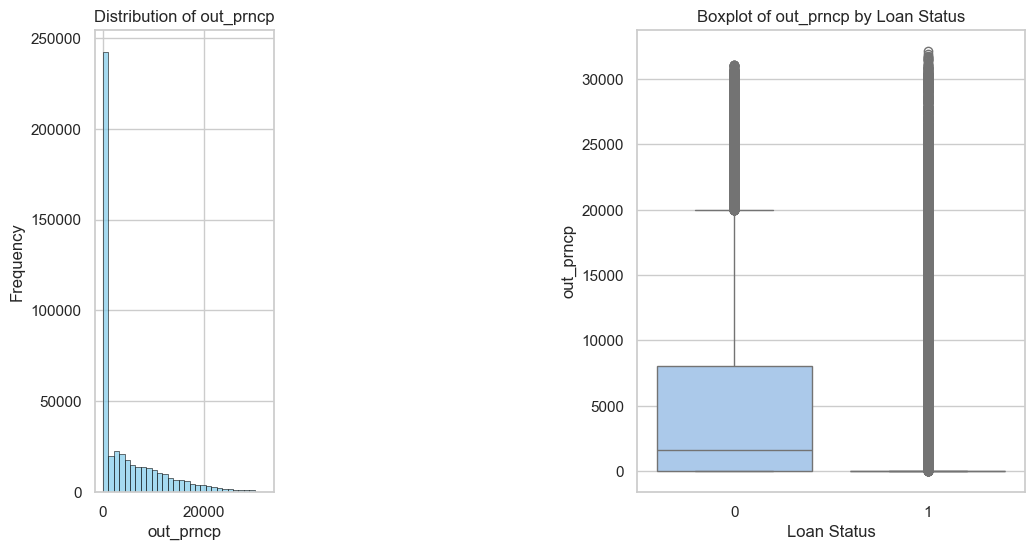

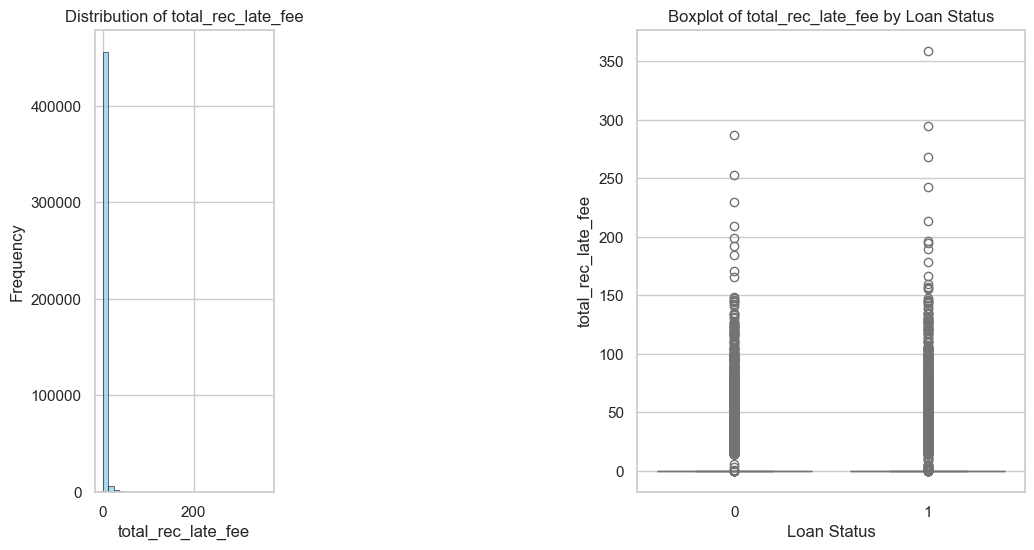

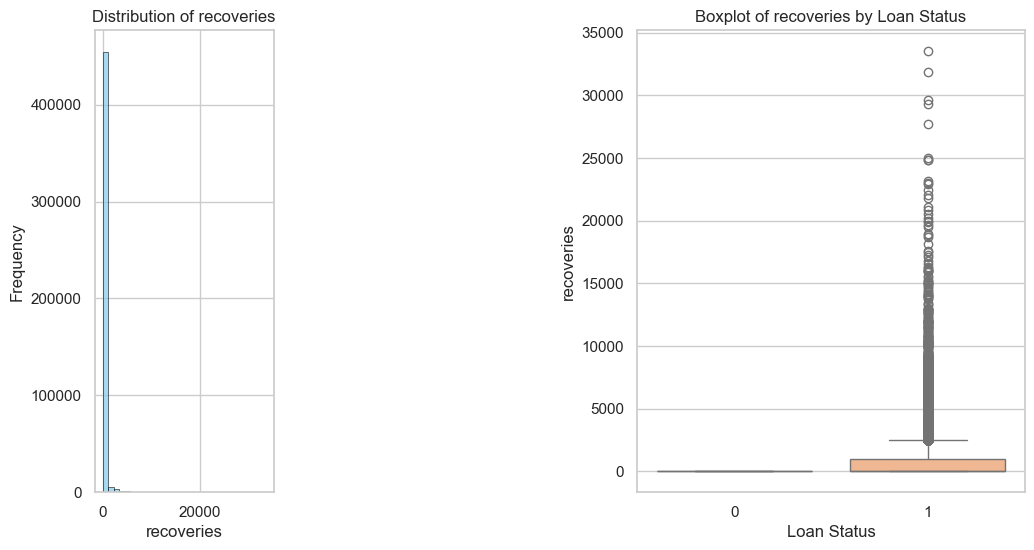

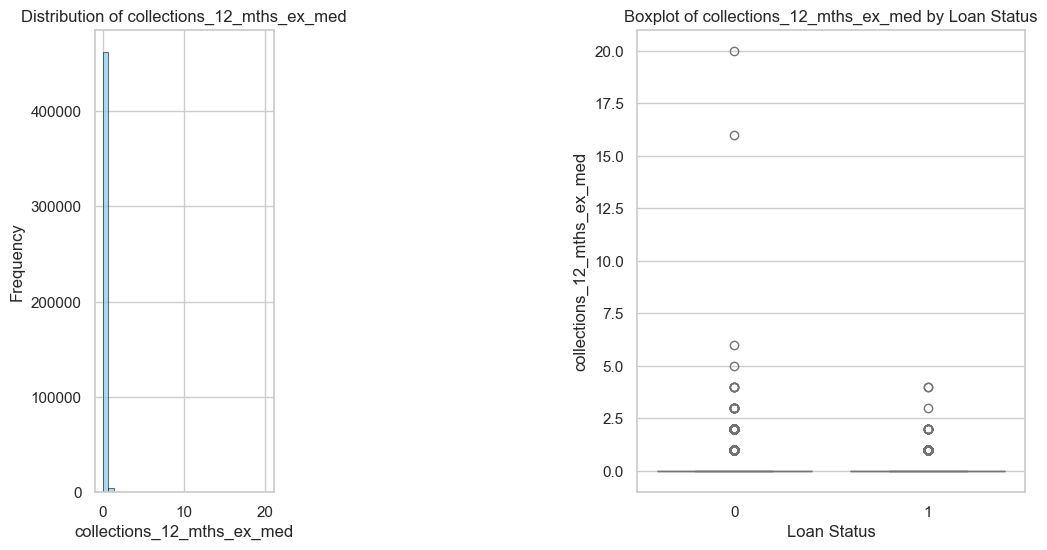

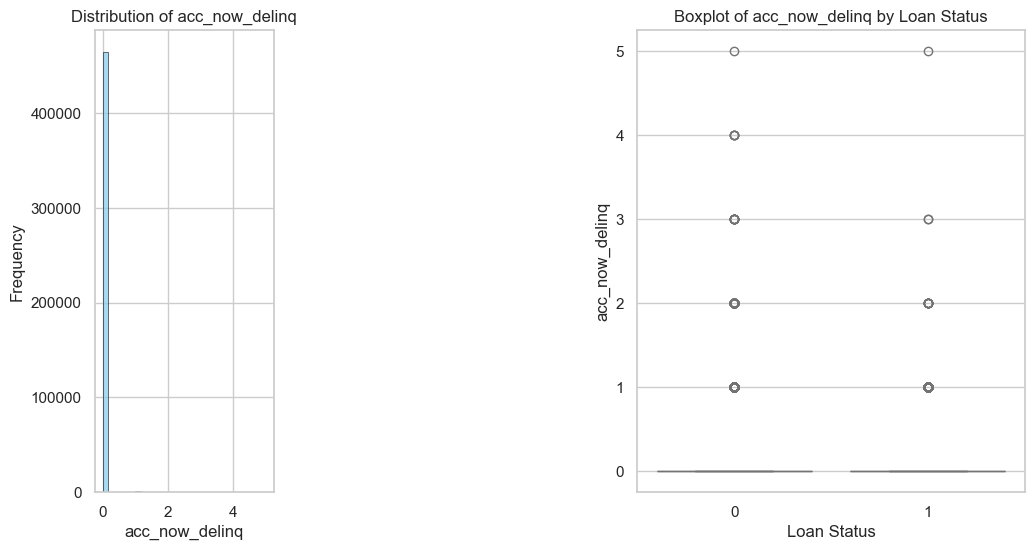

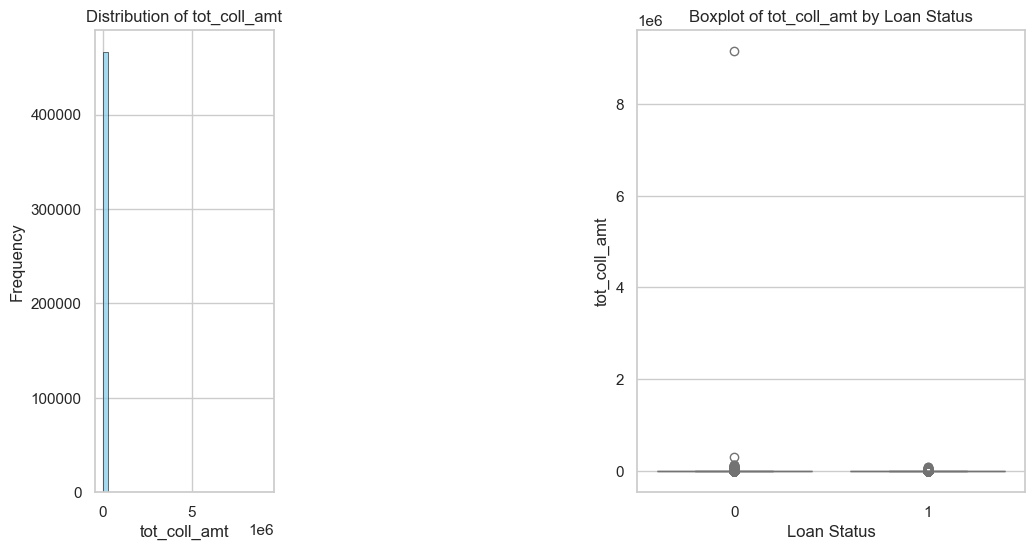

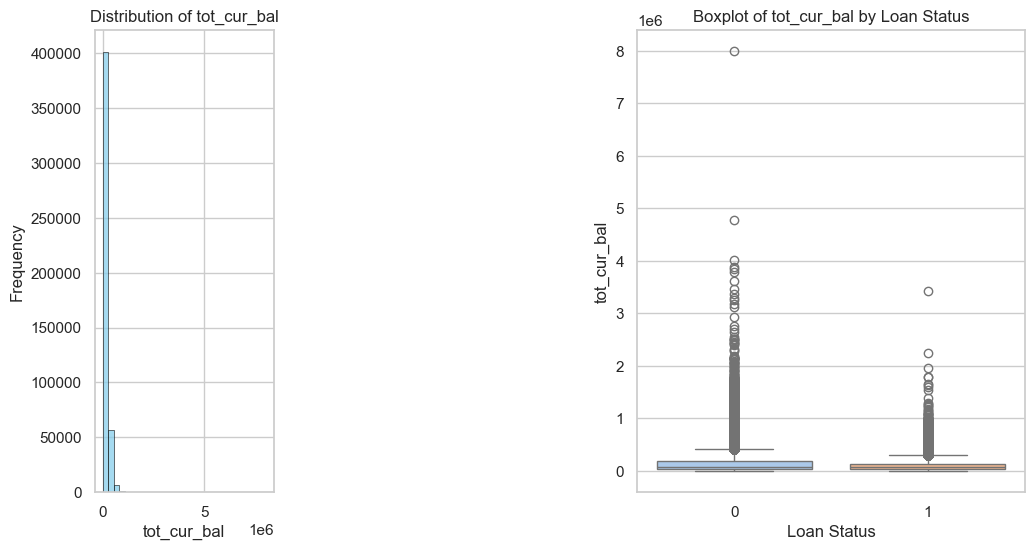

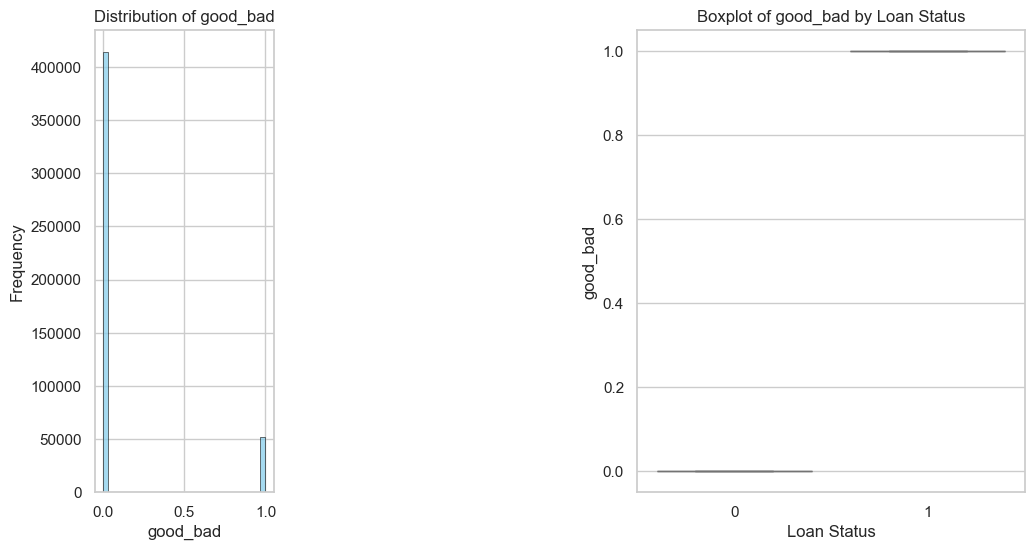

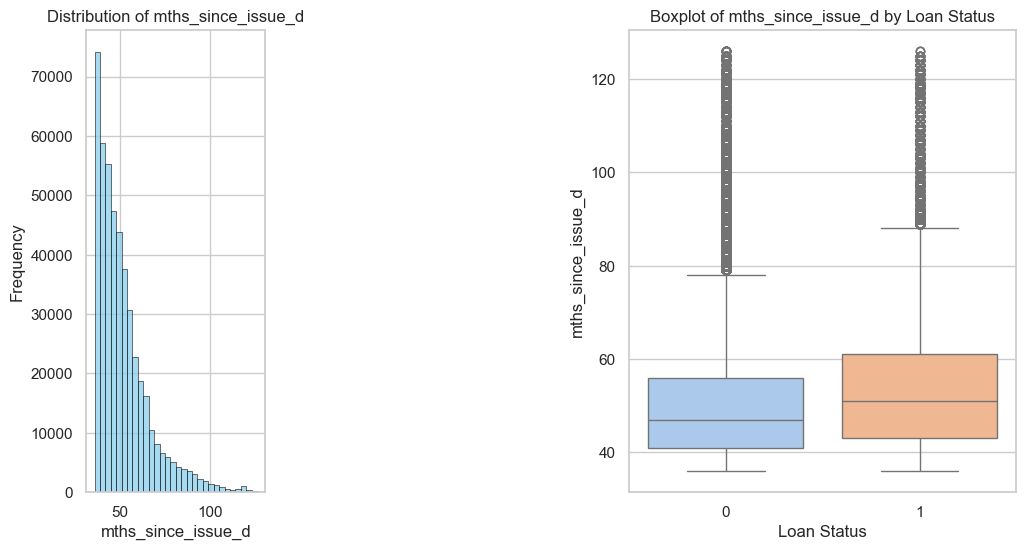

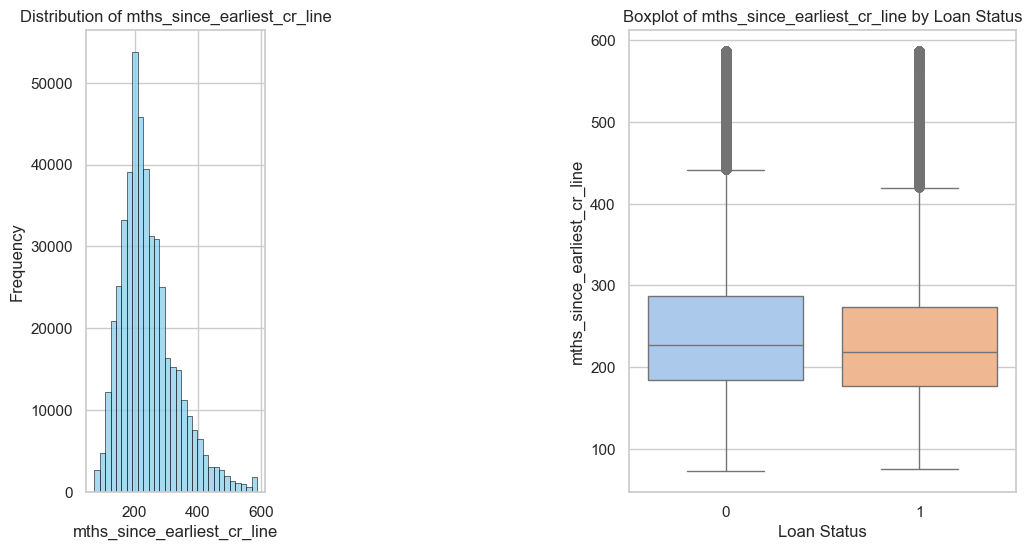

In [95]:
numerical_cols=df.select_dtypes(exclude= ['object','bool']).columns.tolist()
for col in numerical_cols:
    plt.figure(figsize=(12, 6))
    plt.subplots_adjust(wspace=0.4)
    plt.subplot(1, 2, 1)
    sns.histplot(df[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    sns.boxplot(x='good_bad', y=col, data=df, palette='pastel')
    plt.title(f'Boxplot of {col} by Loan Status')
    plt.xlabel('Loan Status')
    plt.ylabel(col)

    plt.show()

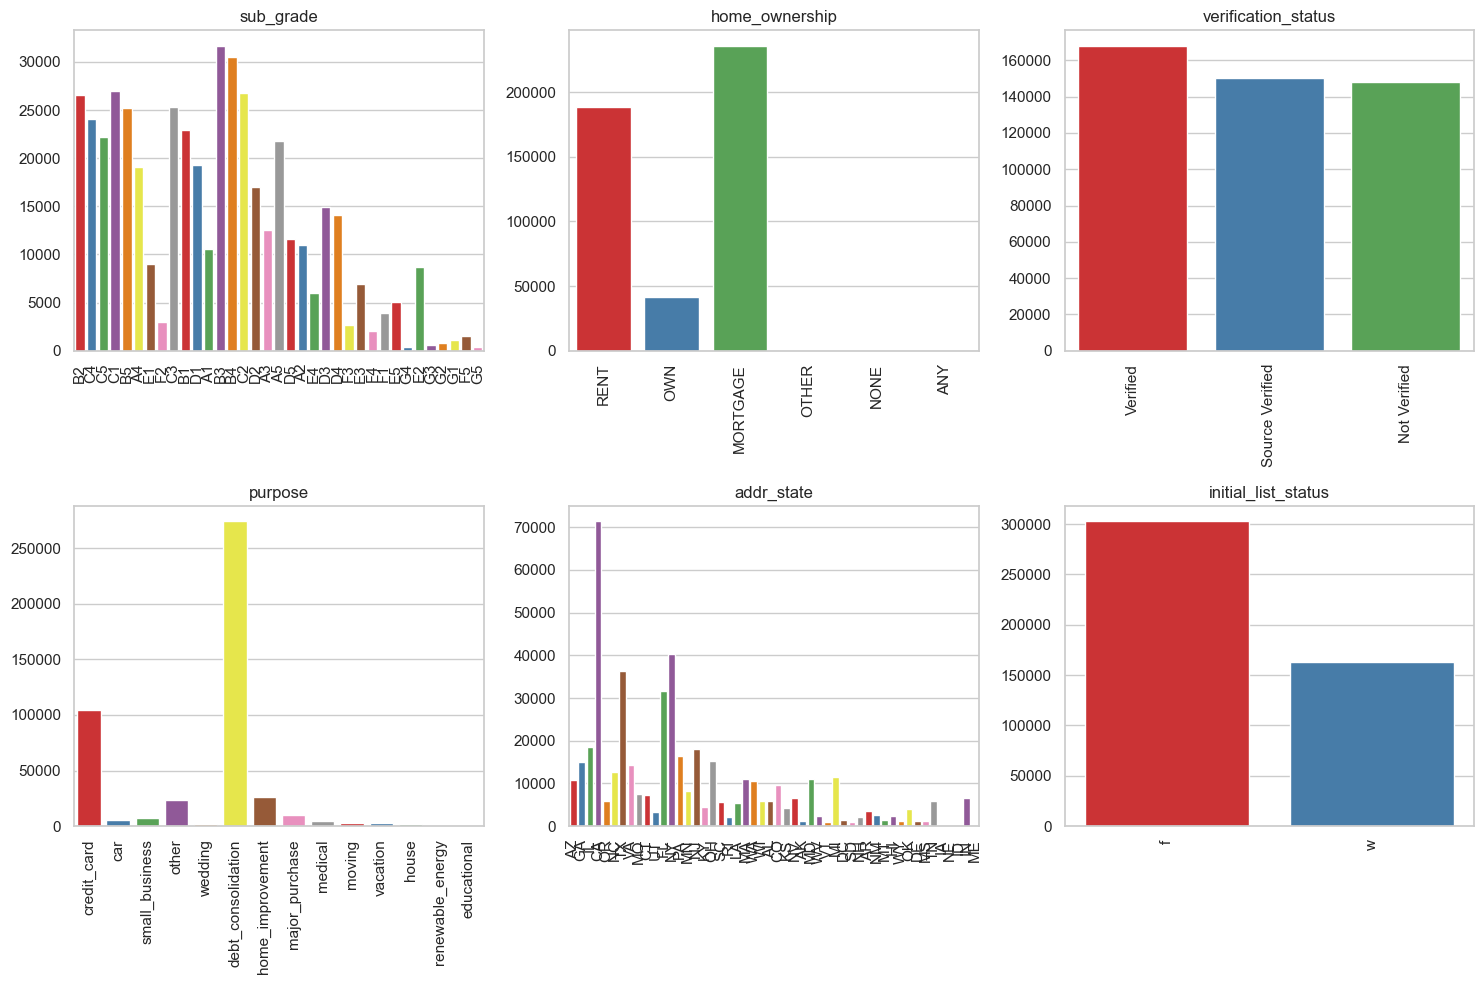

In [105]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
plt.figure(figsize=(15, 10))

for i, column in enumerate(categorical_columns, start=1):
    plt.subplot(2, 3, i)
    sns.countplot(x=column, data=df, palette='Set1')
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# SCALING & TRANSFORMATION

In [106]:
encoded_cols = [col for col in df.select_dtypes(include = 'object').columns.tolist()]
onehot = pd.get_dummies(df[encoded_cols], drop_first = True)

onehot.head()


,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,...,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
num_cols = [col for col in df.columns.tolist() if col not in encoded_cols + ['good_bad']]
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
std = pd.DataFrame(ss.fit_transform(df[num_cols]), columns = num_cols)

std.head()

,loan_amnt,term,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,total_acc,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,mths_since_issue_d,mths_since_earliest_cr_line
0,-1.124392,-0.616225,-0.729587,1.138605,-0.896549,1.328632,-0.357012,0.178920,-1.641544,-0.31429,...,-1.384880,-0.693944,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.343273,1.446626,1.765208
1,-1.426088,1.622784,0.330634,-1.523744,-0.787386,-2.065791,-0.357012,3.843328,-1.641544,-0.31429,...,-1.815923,-0.693944,-0.123464,0.057470,-0.083608,-0.058307,-0.012089,-0.343273,1.446626,-0.212639
2,-1.438156,-0.616225,0.488979,1.138605,-1.110292,-1.082491,-0.357012,1.095022,-1.842050,-0.31429,...,-1.298671,-0.693944,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.343273,1.446626,-0.571196
3,-0.521001,-0.616225,-0.077850,1.138605,-0.438061,0.354248,-0.357012,0.178920,-0.238000,-0.31429,...,1.028959,-0.693944,3.099264,-0.154549,-0.083608,-0.058307,-0.012089,-0.343273,1.446626,0.226882
4,-1.365749,1.622784,-0.261438,-1.257509,0.122313,0.091865,-0.357012,-0.737182,0.764532,-0.31429,...,1.115168,-0.573268,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.343273,1.446626,0.238449


In [108]:
data_model = pd.concat([onehot, std, df[['good_bad']]], axis = 1)
data_model.head(3)

,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,...,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,mths_since_issue_d,mths_since_earliest_cr_line,good_bad
0,0,0,0,0,0,1,0,0,0,0,...,-0.693944,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.343273,1.446626,1.765208,0
1,0,0,0,0,0,0,0,0,0,0,...,-0.693944,-0.123464,0.057470,-0.083608,-0.058307,-0.012089,-0.343273,1.446626,-0.212639,1
2,0,0,0,0,0,0,0,0,0,0,...,-0.693944,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.343273,1.446626,-0.571196,0


# MODELING

## Split Data

In [109]:
from sklearn.model_selection import train_test_split
X = data_model.drop('good_bad', axis=1)
y = data_model['good_bad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [110]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((349713, 126), (116572, 126), (349713,), (116572,))

<Axes: title={'center': 'Bad (1) vs Good (0) Loans Balance'}, xlabel='None'>

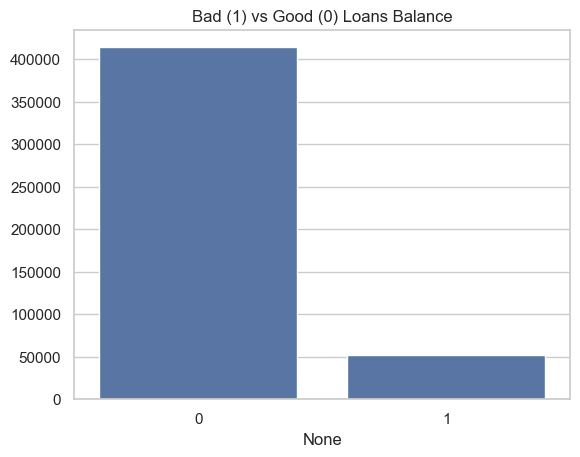

In [111]:
plt.title('Bad (1) vs Good (0) Loans Balance')
sns.barplot(x=data_model.good_bad.value_counts().index,y=data_model.good_bad.value_counts().values)

In [112]:
y_train.value_counts(normalize=True)*100

0    88.808251
1    11.191749
Name: good_bad, dtype: float64

this dataset has imbalanced data.

# Training

In [113]:
# Import Library
from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve
# training
LR= LogisticRegression(max_iter=600).fit(X_train, y_train)
# predicting
y_pred_LR = LR.predict(X_test)

# classification report
target_names = ['good loan', 'bad loan']
print('Classification_Report:')
print(classification_report(y_test, y_pred_LR, digits=4, target_names = target_names))

Classification_Report:
              precision    recall  f1-score   support

   good loan     0.9348    0.9989    0.9658    103525
    bad loan     0.9803    0.4472    0.6142     13047

    accuracy                         0.9371    116572
   macro avg     0.9576    0.7230    0.7900    116572
weighted avg     0.9399    0.9371    0.9264    116572



In [114]:
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier(max_depth=4)
model_rfc.fit(X_train, y_train)
y_pred_rfc = model_rfc.predict(X_test)

# classification report
target_names = ['good loan', 'bad loan']
print('Classification_Report:')
print(classification_report(y_test, y_pred_rfc, digits=4, target_names = target_names))

Classification_Report:
              precision    recall  f1-score   support

   good loan     0.8882    1.0000    0.9408    103525
    bad loan     1.0000    0.0017    0.0034     13047

    accuracy                         0.8883    116572
   macro avg     0.9441    0.5008    0.4721    116572
weighted avg     0.9008    0.8883    0.8359    116572



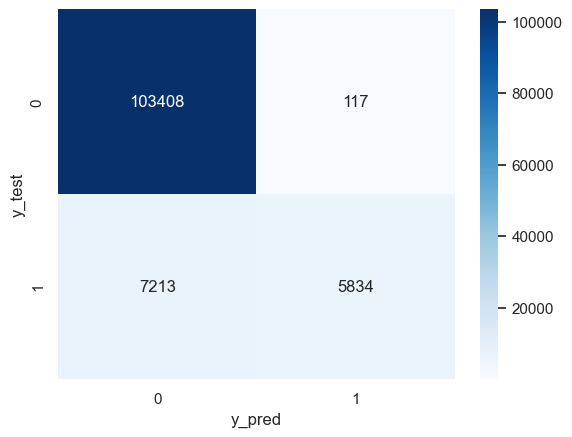

In [115]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred_LR)
sns.heatmap(cm, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

- Logistic Regression:
    This model performed much better than Random Forest. The high precision in the "bad loan" category shows that this model is very good at identifying high-risk loans. However, since the recall is also very high, this model may be too strict and discard too many actual low-risk loans.


- Random Forest: 
    This model has perfect precision for the "good loan" category, but very low recall. This suggests that while this model can identify low-risk loans very well (high precision), it fails to identify most of the actual low-risk loans (low recall).

especially the very low recall for minority classes, this model cannot be considered good for this case. The model achieved high accuracy by predicting only the majority class, but failed to capture the minority class,

This is due to the unbalanced dataset that the machine learning model ignores the minority class (bad loan class) completely.

Thus, this class imbalance may affect the model during training. This is a problem because bad loan data (minority class) is needed for this prediction model.
The minority class oversampling technique will be used to overcome this data imbalance.

## Oversampling Minority Class to Resolve Class Imbalance

Random Over Sampling

Random oversampling involves randomly duplicating examples from the minority class and adding them to the training dataset.

In [116]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

print('Before OverSampling:\n{}'.format(y_train.value_counts()))
print('\nAfter OverSampling:\n{}'.format(y_train_ros.value_counts()))

Before OverSampling:
0    310574
1     39139
Name: good_bad, dtype: int64

After OverSampling:
0    310574
1    310574
Name: good_bad, dtype: int64


In [117]:
y_train_ros.value_counts(normalize=True)

0    0.5
1    0.5
Name: good_bad, dtype: float64

## Train model after resampling

### Logistic Regression

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [119]:
LR_ros= LogisticRegression(max_iter=600)  
LR_ros.fit(X_train_ros, y_train_ros)

#predicting
y_pred_LR_ros = LR_ros.predict(X_test)

#classification report
print('Classification_Report:')
print(classification_report(y_test, y_pred_LR_ros, digits=4))

Classification_Report:
              precision    recall  f1-score   support

           0     0.9550    0.8999    0.9266    103525
           1     0.4552    0.6634    0.5399     13047

    accuracy                         0.8735    116572
   macro avg     0.7051    0.7817    0.7333    116572
weighted avg     0.8991    0.8735    0.8834    116572



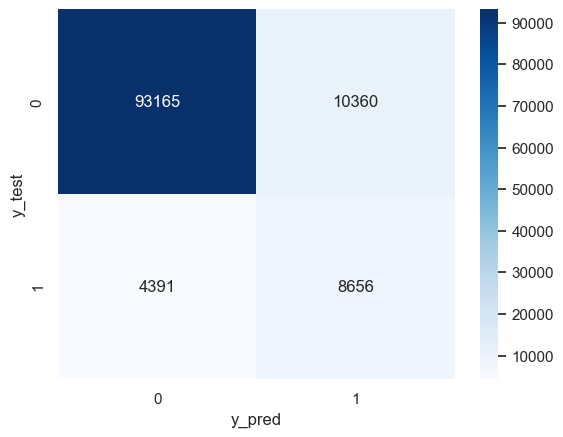

In [120]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred_LR_ros)
sns.heatmap(cm, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

### Decision Tree

In [121]:
dt_ros = DecisionTreeClassifier(max_depth = 10)
dt_ros.fit(X_train_ros, y_train_ros)

#predicting
y_pred_dt_ros = dt_ros.predict(X_test)

#classification report
print('Classification_Report:')
print(classification_report(y_test, y_pred_dt_ros, digits=4))


Classification_Report:
              precision    recall  f1-score   support

           0     0.9596    0.8724    0.9139    103525
           1     0.4117    0.7084    0.5207     13047

    accuracy                         0.8541    116572
   macro avg     0.6856    0.7904    0.7173    116572
weighted avg     0.8983    0.8541    0.8699    116572



### Random Forest

In [122]:
rf_ros = RandomForestClassifier(max_depth=10, n_estimators=20)
rf_ros.fit(X_train_ros, y_train_ros)

#predicting
y_pred_rf_ros = rf_ros.predict(X_test)

#classification report
print('Classification_Report:')
print(classification_report(y_test, y_pred_rf_ros, digits=4))

Classification_Report:
              precision    recall  f1-score   support

           0     0.9594    0.8661    0.9103    103525
           1     0.4002    0.7092    0.5117     13047

    accuracy                         0.8485    116572
   macro avg     0.6798    0.7876    0.7110    116572
weighted avg     0.8968    0.8485    0.8657    116572



### XGBoost

In [124]:
from xgboost import XGBClassifier
xgb_ros = XGBClassifier(max_depth=5)
xgb_ros.fit(X_train_ros, y_train_ros)

#predicting
y_pred_xgb_ros = xgb_ros.predict(X_test)

#classification report
print('Classification_Report:')
print(classification_report(y_test, y_pred_xgb_ros, digits=4))

Classification_Report:
              precision    recall  f1-score   support

           0     0.9647    0.8874    0.9244    103525
           1     0.4537    0.7421    0.5631     13047

    accuracy                         0.8711    116572
   macro avg     0.7092    0.8147    0.7437    116572
weighted avg     0.9075    0.8711    0.8840    116572



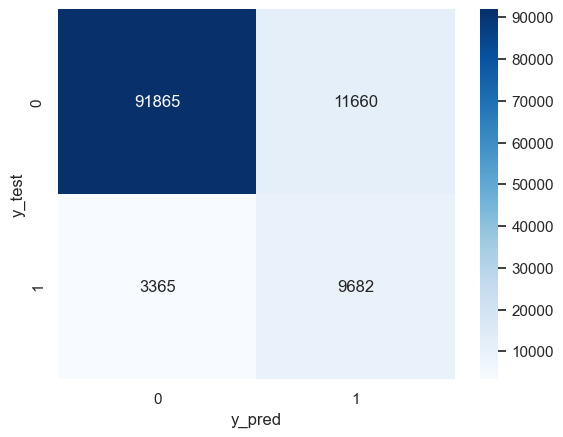

In [133]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred_xgb_ros)
sns.heatmap(cm, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

The best average accuracy result among all the models above is using XGBoost with an average accuracy value of 87%. This model has better performance in identifying high-risk loans (high precision and good recall).

In [134]:
arr_feature_importances = xgb_ros.feature_importances_
arr_feature_names = X_train.columns.values
df_feature_importance = pd.DataFrame(index=range(len(arr_feature_importances)), columns=['feature', 'importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['importance'] = arr_feature_importances
df_all_features = df_feature_importance.sort_values(by='importance', ascending=False)
df_all_features

,feature,importance
119,recoveries,0.741547
118,total_rec_late_fee,0.040929
106,int_rate,0.013673
105,term,0.008086
103,initial_list_status_w,0.007539
...,...,...
99,addr_state_WA,0.000000
100,addr_state_WI,0.000000
36,home_ownership_OTHER,0.000000
35,home_ownership_NONE,0.000000


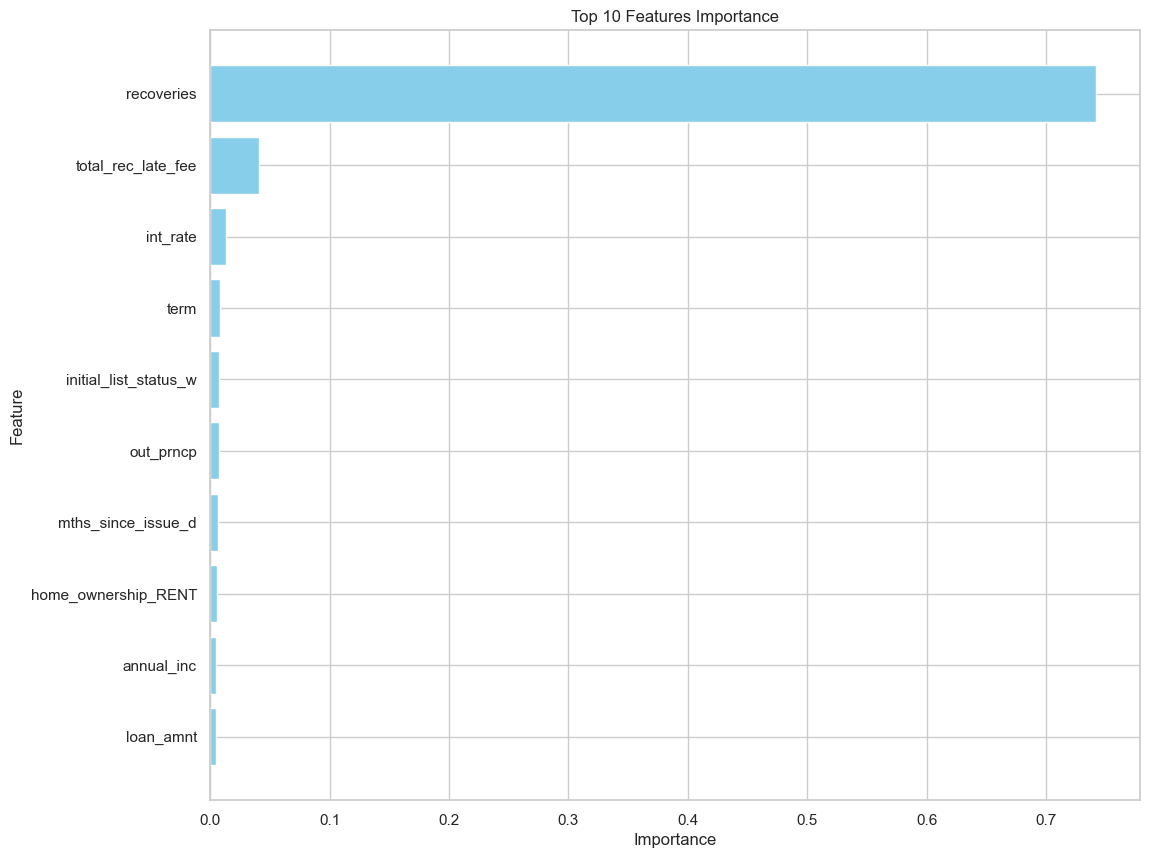

In [135]:
top_features = df_all_features.head(10)

plt.figure(figsize=(12, 10))
plt.barh(top_features['feature'], top_features['importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Features Importance')
plt.gca().invert_yaxis()  
plt.show()

# Validation

measuring model performance using AUC (abbrevation for area under the curve) & KS (Kolmogorov-Smirnov)

In [136]:
y_pred_prob = xgb_ros.predict_proba(X_test)[:][:,1]
df_act_pred = pd.concat([pd.DataFrame(np.array(y_test), columns = ['y_actual']), pd.DataFrame(y_pred_prob, columns = ['y_pred_prob'])], axis = 1)
df_act_pred.index = y_test.index

### AUC (Abbrevation for Area Under the Curve)

In [137]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, tr = roc_curve(df_act_pred['y_actual'], df_act_pred['y_pred_prob'])
auc = roc_auc_score(df_act_pred['y_actual'], df_act_pred['y_pred_prob'])

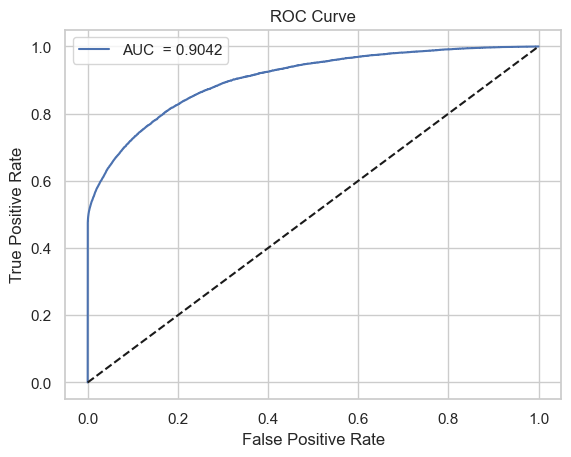

In [138]:
plt.plot(fpr, tpr, label = 'AUC  = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

## KS (Kolmogorov-Smirnov)

In [139]:
df_act_pred = df_act_pred.sort_values('y_pred_prob')
df_act_pred = df_act_pred.reset_index()
df_act_pred['Cumulative N Population'] = df_act_pred.index + 1
df_act_pred['Cumulative N Bad'] = df_act_pred['y_actual'].cumsum()
df_act_pred['Cumulative N Good'] = df_act_pred['Cumulative N Population'] - df_act_pred['Cumulative N Bad']
df_act_pred['Cumulative Perc Population'] = df_act_pred['Cumulative N Population'] / df_act_pred.shape[0]
df_act_pred['Cumulative Perc Bad'] = df_act_pred['Cumulative N Bad'] / df_act_pred['y_actual'].sum()
df_act_pred['Cumulative Perc Good'] = df_act_pred['Cumulative N Good'] / (df_act_pred.shape[0] - df_act_pred['y_actual'].sum())

In [140]:
df_act_pred.head()

,index,y_actual,y_pred_prob,Cumulative N Population,Cumulative N Bad,Cumulative N Good,Cumulative Perc Population,Cumulative Perc Bad,Cumulative Perc Good
0,275311,0,0.001529,1,0,1,0.000009,0.0,0.000010
1,249831,0,0.001999,2,0,2,0.000017,0.0,0.000019
2,331760,0,0.002071,3,0,3,0.000026,0.0,0.000029
3,239915,0,0.002148,4,0,4,0.000034,0.0,0.000039
4,313730,0,0.002368,5,0,5,0.000043,0.0,0.000048


Text(0.5, 1.0, 'Kolmogorov-Smirnov : 0.6327')

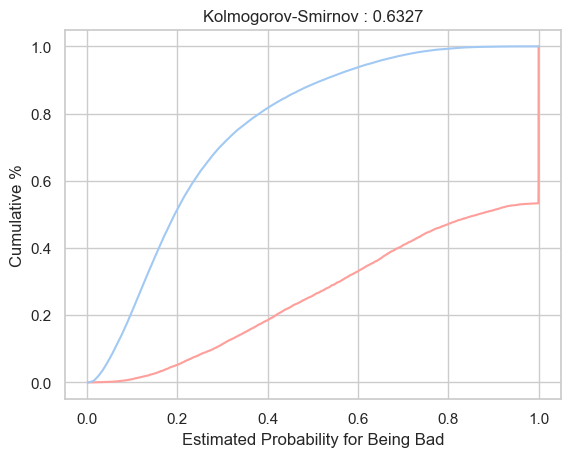

In [141]:
KS = max(df_act_pred['Cumulative Perc Good'] - df_act_pred['Cumulative Perc Bad'])

plt.plot(df_act_pred['y_pred_prob'], df_act_pred['Cumulative Perc Bad'], color = 'r')
plt.plot(df_act_pred['y_pred_prob'], df_act_pred['Cumulative Perc Good'], color = 'b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov : %0.4f' %KS)

# Conclusion

- AUC (Area Under the ROC Curve): 
<br>AUC is a measure of how well the model can distinguish between positive and negative classes. The higher the AUC value, the better the model is at correctly predicting the positive class. In the context of credit risk, this means the model's ability to distinguish between borrowers who repay their loans well and borrowers who default.
> AUC = 0.904: This value indicates that the model has a fairly good ability to distinguish between good and bad borrowers.


- KS (Kolmogorov-Smirnov): 
<br>KS is the difference between two cumulative distribution functions: a positive cumulative distribution function (positive CDF) for the high-risk group and a negative cumulative distribution function (negative CDF) for the low-risk group. The maximum KS value indicates that the model can separate the high and low risk groups well.
> KS = 0.63: A high KS value indicates that the model can distinguish well between the high and low risk groups, with the greatest difference at the point where sensitivity and specificity reach a maximum.

In the world of credit risk modeling, generally AUC above 0.7 and KS above 0.3 are considered good performance.

# Recommendations


Some other things that can be done for this project:

- If you want higher interpretability, you can consider creating a Credit Scorecard using Logistic Regression algorithm with approaches such as Feature Selection using Information Value and Feature Engineering using Weight of Evidence.

- If interpretability is not necessary, one can consider trying other Machine Learning algorithms such as Boosting.

- Perform hyperparameter tuning.

- Checking or ensuring that the model is not overfitting. This can be done by trying to compare the performance of the model when predicted against training data and when predicted against testing data.

- Generally, it is more appropriate to perform a Train-Test Split first before performing feature transformations such as encoding or scaling. However, for simplicity reasons this example does the opposite as generally the performance difference is not too different.